# 🟦 **Late-Fusion tabular - imágenes**🟦

## **Modelo Tabular**


Uitlizaré el "mejor" modelo entrenado tabular que es el
✅ Stacking (NN + XGBoost + Meta-Modelo Ridge)

MAE Log: 0.0626 (mejor en la tabla)
R² Log: 0.9569
R² Original: 0.8306

En este caso, el meta-modelo Ridge es un modelo de stacking que usa como entrada las predicciones de los siguientes modelos:

1️⃣ XGBoost (xgb_model_stacking.pkl)
2️⃣ Red Neuronal Base (modelo_tabular_red1_original.keras)
3️⃣ Meta-Modelo Ridge (meta_model_ridge.pkl)

## **Modelo Imágenes**

Utilizaré el modelo Early-Fusion ResNet Tuned (mod_early_fusion_resnet_tuned.keras)

Entrenamiento:

MAE: 0.4107
RMSE: 0.5001
R²: 0.5183

Validación:

MAE: 0.5940
RMSE: 0.7885
R²: -0.1660

Test:

MAE: 0.5510
RMSE: 0.7089
R²: -0.0506


In [ ]:
import numpy as np
import tensorflow as tf
import pickle
import os

# Montar Google Drive si usas Google Colab
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Cargar modelos individuales previamente entrenados**

In [ ]:
# Ruta base donde están los modelos
base_path = "/content/drive/MyDrive/Deep_Learning_2024/Notebooks/models/"

# Cargar modelo tabular (Stacking con Ridge)
with open(os.path.join(base_path, "meta_model_ridge.pkl"), "rb") as file:
    meta_model_ridge = pickle.load(file)

# Cargar modelo de imágenes (ResNet50 Early Fusion Tuned)
model_images = tf.keras.models.load_model(os.path.join(base_path, "mod_early_fusion_resnet_tuned.keras"))

print("✅ Modelos cargados correctamente.")


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator Ridge from version 1.6.0 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


✅ Modelos cargados correctamente.


In [ ]:
import pickle

# Ruta del modelo Ridge
meta_model_path = "/content/drive/MyDrive/Deep_Learning_2024/Notebooks/models/meta_model_ridge.pkl"

# Cargar el modelo
with open(meta_model_path, "rb") as file:
    meta_model_ridge = pickle.load(file)

# Verificar que el modelo se ha cargado correctamente
print(meta_model_ridge)


Ridge()


## **Generar y guardar predicciones de los modelos base**

In [ ]:
import pandas as pd
# Cargar datos
X_val_tab = pd.read_csv("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/X_val_tab.csv", sep=";")
X_test_tab = pd.read_csv("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/X_test_tab.csv", sep=";")

imgs_val = np.load("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/imgs_val_normalized.npy")
imgs_test = np.load("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/imgs_test_normalized.npy")

In [ ]:
import numpy as np

# Ruta donde están guardadas las etiquetas
base_path = "/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/"

# Cargar etiquetas
y_val = np.load(base_path + "y_val_tab.npy")
y_test = np.load(base_path + "y_test_tab.npy")

# Verificar que las dimensiones coincidan
print("Shape de X_val_tab:", X_val_tab.shape)
print("Shape de y_val:", y_val.shape)

print("Shape de X_test_tab:", X_test_tab.shape)
print("Shape de y_test:", y_test.shape)


Shape de X_val_tab: (373, 32)
Shape de y_val: (373,)
Shape de X_test_tab: (622, 32)
Shape de y_test: (622,)


# **Cargar/generar las predicciones de cada modelo y guardar**

In [ ]:
import numpy as np
import pickle
import tensorflow as tf
import pandas as pd

# Cargar modelos base
tabular_model = tf.keras.models.load_model("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/models/modelo_tabular_red1_original.keras")

with open("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/models/xgb_model_stacking.pkl", "rb") as file:
    xgb_model = pickle.load(file)

image_model = tf.keras.models.load_model("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/models/mod_early_fusion_resnet_tuned.keras")

# Cargar datos
X_val_tab = pd.read_csv("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/X_val_tab.csv", sep=";")
X_test_tab = pd.read_csv("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/X_test_tab.csv", sep=";")

imgs_val = np.load("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/imgs_val_normalized.npy")
imgs_test = np.load("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/imgs_test_normalized.npy")

# Generar predicciones
pred_tabular_val = tabular_model.predict(X_val_tab)
pred_tabular_test = tabular_model.predict(X_test_tab)

pred_xgb_val = xgb_model.predict(X_val_tab)
pred_xgb_test = xgb_model.predict(X_test_tab)

pred_images_val = image_model.predict([imgs_val, X_val_tab])
pred_images_test = image_model.predict([imgs_test, X_test_tab])

# Guardar predicciones
np.save("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/models/pred_tabular_val.npy", pred_tabular_val)
np.save("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/models/pred_tabular_test.npy", pred_tabular_test)

np.save("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/models/pred_xgb_val.npy", pred_xgb_val)
np.save("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/models/pred_xgb_test.npy", pred_xgb_test)

np.save("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/models/pred_images_val.npy", pred_images_val)
np.save("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/models/pred_images_test.npy", pred_images_test)

print("✅ Predicciones guardadas correctamente.")


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 75s 6s/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 119s 6s/step
✅ Predicciones guardadas correctamente.


In [ ]:
import numpy as np

# Cargar predicciones
pred_tabular_val = np.load("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/models/pred_tabular_val.npy")
pred_tabular_test = np.load("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/models/pred_tabular_test.npy")

pred_images_val = np.load("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/models/pred_images_val.npy")
pred_images_test = np.load("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/models/pred_images_test.npy")

# Verificar shapes
print("Shape de pred_tabular_val:", pred_tabular_val.shape)
print("Shape de pred_tabular_test:", pred_tabular_test.shape)
print("Shape de pred_images_val:", pred_images_val.shape)
print("Shape de pred_images_test:", pred_images_test.shape)


Shape de pred_tabular_val: (373, 1)
Shape de pred_tabular_test: (622, 1)
Shape de pred_images_val: (373, 1)
Shape de pred_images_test: (622, 1)


## **Fusión de predicciones en unico df para el Meta-Modelo**

In [ ]:
# Concatenar las predicciones como input del meta-modelo
X_meta_val = np.column_stack((pred_tabular_val, pred_images_val))
X_meta_test = np.column_stack((pred_tabular_test, pred_images_test))

# Las etiquetas son las mismas de validación y test
y_meta_val = y_val
y_meta_test = y_test

# Verificar shapes
print("Shape de X_meta_val:", X_meta_val.shape)
print("Shape de X_meta_test:", X_meta_test.shape)
print("Shape de y_meta_val:", y_meta_val.shape)
print("Shape de y_meta_test:", y_meta_test.shape)


Shape de X_meta_val: (373, 2)
Shape de X_meta_test: (622, 2)
Shape de y_meta_val: (373,)
Shape de y_meta_test: (622,)


In [ ]:
import numpy as np

# Guardar los datasets de Late Fusion
np.save("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/X_meta_val.npy", X_meta_val)
np.save("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/X_meta_test.npy", X_meta_test)
np.save("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/y_meta_val.npy", y_meta_val)
np.save("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/y_meta_test.npy", y_meta_test)

print("✅ Datos de Late Fusion guardados correctamente.")

"""
# Cargar los datos de Late Fusion
X_meta_val = np.load("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/X_meta_val.npy")
X_meta_test = np.load("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/X_meta_test.npy")
y_meta_val = np.load("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/y_meta_val.npy")
y_meta_test = np.load("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/y_meta_test.npy")

print("✅ Datos de Late Fusion cargados correctamente.")

"""


✅ Datos de Late Fusion guardados correctamente.


In [ ]:
# Cargar los datos de Late Fusion
X_meta_val = np.load("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/X_meta_val.npy")
X_meta_test = np.load("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/X_meta_test.npy")
y_meta_val = np.load("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/y_meta_val.npy")
y_meta_test = np.load("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/y_meta_test.npy")

print("✅ Datos de Late Fusion cargados correctamente.")

✅ Datos de Late Fusion cargados correctamente.


# ⭐ **Entrenar modelo Late-Fusion Ridge**


Resultados en Log:
Validación (Log): MAE: 0.2747, RMSE: 0.3900, R²: 0.7148
Test (Log): MAE: 0.2999, RMSE: 0.4242, R²: 0.6239

Resultados en Escala Original:
Validación (Original): MAE: 0.2747, RMSE: 0.3900, R²: 0.7148
Test (Original): MAE: 0.2999, RMSE: 0.4242, R²: 0.6239
Modelo de Late Fusion guardado correctamente.


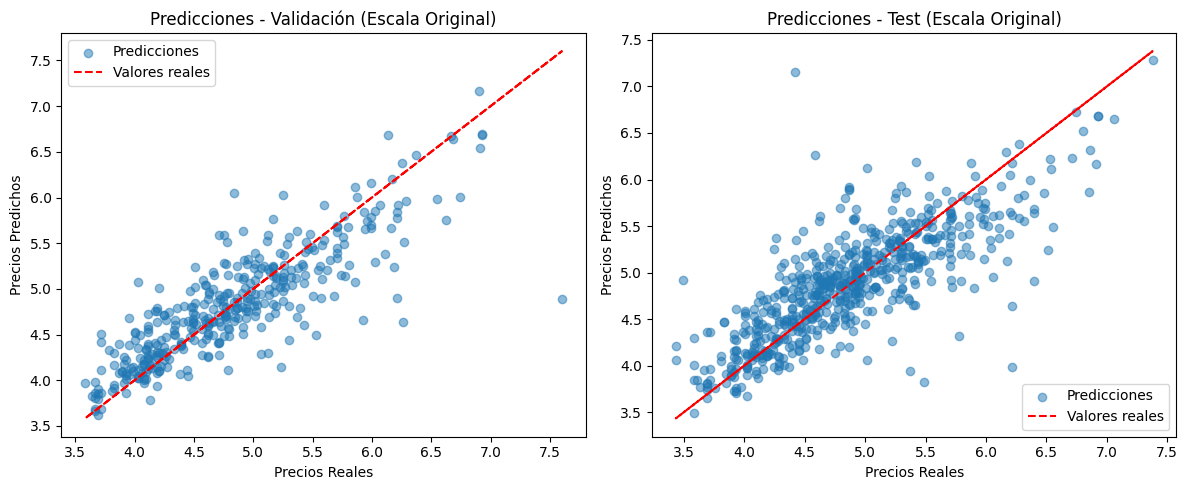

In [ ]:
import numpy as np
import joblib
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Definir el modelo de Ridge para late-fusion
meta_model = Ridge(alpha=1.0)

# Entrenar el modelo con los datos de val
meta_model.fit(X_meta_val, y_meta_val)

# Generar predicciones del modelo meta
pred_meta_val = meta_model.predict(X_meta_val)
pred_meta_test = meta_model.predict(X_meta_test)

# Cálculo de métricas
def calcular_metricas(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

# Resultados en Log
mae_val_log, rmse_val_log, r2_val_log = calcular_metricas(y_meta_val, pred_meta_val)
mae_test_log, rmse_test_log, r2_test_log = calcular_metricas(y_meta_test, pred_meta_test)

# Resultados en Escala Original
mae_val_original, rmse_val_original, r2_val_original = calcular_metricas(y_meta_val, pred_meta_val)
mae_test_original, rmse_test_original, r2_test_original = calcular_metricas(y_meta_test, pred_meta_test)

# Imprimir Resultados
print("\nResultados en Log:")
print(f"Validación (Log): MAE: {mae_val_log:.4f}, RMSE: {rmse_val_log:.4f}, R²: {r2_val_log:.4f}")
print(f"Test (Log): MAE: {mae_test_log:.4f}, RMSE: {rmse_test_log:.4f}, R²: {r2_test_log:.4f}")

print("\nResultados en Escala Original:")
print(f"Validación (Original): MAE: {mae_val_original:.4f}, RMSE: {rmse_val_original:.4f}, R²: {r2_val_original:.4f}")
print(f"Test (Original): MAE: {mae_test_original:.4f}, RMSE: {rmse_test_original:.4f}, R²: {r2_test_original:.4f}")

# Guardar el Modelo al Final
joblib.dump(meta_model, "/content/drive/MyDrive/Deep_Learning_2024/Notebooks/models/meta_fusion_ridge_model.pkl")
print("Modelo de Late Fusion guardado correctamente.")

# Visualización de Predicciones
plt.figure(figsize=(12, 5))

# Scatter Plot - Validación
plt.subplot(1, 2, 1)
plt.scatter(y_meta_val, pred_meta_val, alpha=0.5, label="Predicciones")
plt.plot(y_meta_val, y_meta_val, color="red", linestyle="--", label="Valores reales")
plt.xlabel("Precios Reales")
plt.ylabel("Precios Predichos")
plt.title("Predicciones - Validación (Escala Original)")
plt.legend()

# Scatter Plot - Test
plt.subplot(1, 2, 2)
plt.scatter(y_meta_test, pred_meta_test, alpha=0.5, label="Predicciones")
plt.plot(y_meta_test, y_meta_test, color="red", linestyle="--", label="Valores reales")
plt.xlabel("Precios Reales")
plt.ylabel("Precios Predichos")
plt.title("Predicciones - Test (Escala Original)")
plt.legend()

plt.tight_layout()
plt.show()


## **Análisis de Resultados de Late Fusion Ridge**

El R² en validación es de 0.71, lo que indica que el modelo explica el 71% de la varianza en los datos de validación.

En test, el R² baja a 0.62, lo cual sugiere una ligera caída en el rendimiento generalizado, pero sigue siendo aceptable.

El RMSE es bajo, lo que indica que el modelo tiene errores pequeños en promedio.

El MAE en validación y test es similar (~0.27 - 0.30), lo que sugiere que el modelo es estable y no sufre de overfitting grave.

**Plots**

El modelo predice con buena precisión en ambos conjuntos (validación y test).

No hay sesgos visibles, la distribución sigue la línea de referencia de valores reales.

No hay overfitting severo, ya que test y validación tienen patrones similares.

**Late Fusion Ridge ha mejorado la estabilidad y precisión del modelo.**

### 💸**Comparación entre precios reales y predichos sin log LATE FUSION RIDGE**

In [ ]:
import pandas as pd
import numpy as np

# Asegurar transformación a escala original si están en log
y_meta_test_original = np.expm1(y_meta_test)
pred_meta_test_original = np.expm1(pred_meta_test)

# Crear un DataFrame con los valores
df_comparacion = pd.DataFrame({
    "Precios Reales": y_meta_test_original,
    "Precios Predichos": pred_meta_test_original
})

# Seleccionar 10 muestras aleatorias
df_muestras = df_comparacion.sample(10, random_state=42)

# Mostrar las muestras
print(df_muestras)


     Precios Reales  Precios Predichos
249           331.0         218.630859
399            99.0         128.262726
174           189.0         118.320610
280           112.0         135.272842
110           296.0         181.405212
244           229.0         167.311569
228            86.0         108.361794
227           146.0         161.308838
463           150.0         201.982040
148            32.0         135.952911


## **Ajustando alpha Late-Fusion Ridge para mejorar métricas**

In [ ]:
import numpy as np
import joblib
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Definir la búsqueda de hiperparámetros para Alpha en Ridge
param_grid = {"alpha": np.logspace(-4, 2, 10)}  # Busca entre 10⁻⁴ y 10² en escala logarítmica

# Configurar el modelo Ridge con GridSearchCV
ridge_search = GridSearchCV(Ridge(), param_grid, scoring="neg_mean_absolute_error", cv=5, verbose=1, n_jobs=-1)
ridge_search.fit(X_meta_val, y_meta_val)

# Mejor valor de alpha encontrado
best_alpha = ridge_search.best_params_["alpha"]
print(f"Mejor alpha encontrado: {best_alpha}")

# Entrenar el modelo final con el mejor alpha
meta_model = Ridge(alpha=best_alpha)
meta_model.fit(X_meta_val, y_meta_val)

# Generar predicciones con el modelo ajustado
pred_meta_val = meta_model.predict(X_meta_val)
pred_meta_test = meta_model.predict(X_meta_test)

# Función para calcular métricas
def calcular_metricas(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

# Resultados en Log
mae_val_log, rmse_val_log, r2_val_log = calcular_metricas(y_meta_val, pred_meta_val)
mae_test_log, rmse_test_log, r2_test_log = calcular_metricas(y_meta_test, pred_meta_test)

# Resultados en Escala Original
y_meta_val_original = np.expm1(y_meta_val)
y_meta_test_original = np.expm1(y_meta_test)
pred_meta_val_original = np.expm1(pred_meta_val)
pred_meta_test_original = np.expm1(pred_meta_test)

mae_val_original, rmse_val_original, r2_val_original = calcular_metricas(y_meta_val_original, pred_meta_val_original)
mae_test_original, rmse_test_original, r2_test_original = calcular_metricas(y_meta_test_original, pred_meta_test_original)

# Imprimir Resultados
print("\nResultados en Log:")
print(f"Validación (Log): MAE: {mae_val_log:.4f}, RMSE: {rmse_val_log:.4f}, R²: {r2_val_log:.4f}")
print(f"Test (Log): MAE: {mae_test_log:.4f}, RMSE: {rmse_test_log:.4f}, R²: {r2_test_log:.4f}")

print("\nResultados en Escala Original:")
print(f"Validación (Original): MAE: {mae_val_original:.4f}, RMSE: {rmse_val_original:.4f}, R²: {r2_val_original:.4f}")
print(f"Test (Original): MAE: {mae_test_original:.4f}, RMSE: {rmse_test_original:.4f}, R²: {r2_test_original:.4f}")

# Guardar el modelo ajustado
joblib.dump(meta_model, "/content/drive/MyDrive/Deep_Learning_2024/Notebooks/models/meta_fusion_ridge_tuned.pkl")
print("Modelo de Late Fusion con Alpha Optimizado guardado correctamente.")


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Mejor alpha encontrado: 0.0001

Resultados en Log:
Validación (Log): MAE: 0.2744, RMSE: 0.3899, R²: 0.7149
Test (Log): MAE: 0.3007, RMSE: 0.4256, R²: 0.6214

Resultados en Escala Original:
Validación (Original): MAE: 51.8982, RMSE: 127.5334, R²: 0.5199
Test (Original): MAE: 56.3457, RMSE: 108.2717, R²: 0.5569
Modelo de Late Fusion con Alpha Optimizado guardado correctamente.


❓ **No cambio mucho las métricas el cambio en alpha**

# **Modelo Fusion con SVM Support Vector Regression**

In [ ]:
import numpy as np
import joblib
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV


## **Definir y ajustar el modelo SVM**

In [ ]:
# Definir el modelo SVM
svm_model = SVR()

# Definir los hiperparámetros a optimizar
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],  # Regularización
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],  # Kernel coefficient
    'kernel': ['rbf']  # Kernel radial
}

# Realizar búsqueda de hiperparámetros con GridSearchCV
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='neg_mean_absolute_error', verbose=2, n_jobs=-1)
grid_search.fit(X_meta_val, y_meta_val)

# Mejor modelo encontrado
best_svm = grid_search.best_estimator_
print(f"\nMejor modelo SVM encontrado: {grid_search.best_params_}")


Fitting 5 folds for each of 25 candidates, totalling 125 fits

Mejor modelo SVM encontrado: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


## **Entrenar modelo Late Fusion SVM**

In [ ]:
# Entrenar el mejor modelo SVM encontrado
svm_optimized = SVR(C=100, gamma=0.01, kernel='rbf')
svm_optimized.fit(X_meta_val, y_meta_val)

# Generar predicciones
pred_svm_val = svm_optimized.predict(X_meta_val)
pred_svm_test = svm_optimized.predict(X_meta_test)

# Cálculo de métricas
def calcular_metricas(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

# Resultados en Log
mae_val_log, rmse_val_log, r2_val_log = calcular_metricas(y_meta_val, pred_svm_val)
mae_test_log, rmse_test_log, r2_test_log = calcular_metricas(y_meta_test, pred_svm_test)

# Transformar a escala original
y_meta_val_original = np.expm1(y_meta_val)
y_meta_test_original = np.expm1(y_meta_test)
pred_svm_val_original = np.expm1(pred_svm_val)
pred_svm_test_original = np.expm1(pred_svm_test)

mae_val_original, rmse_val_original, r2_val_original = calcular_metricas(y_meta_val_original, pred_svm_val_original)
mae_test_original, rmse_test_original, r2_test_original = calcular_metricas(y_meta_test_original, pred_svm_test_original)

# Imprimir Resultados
print("\nResultados en Log:")
print(f"Validación (Log): MAE: {mae_val_log:.4f}, RMSE: {rmse_val_log:.4f}, R²: {r2_val_log:.4f}")
print(f"Test (Log): MAE: {mae_test_log:.4f}, RMSE: {rmse_test_log:.4f}, R²: {r2_test_log:.4f}")

print("\nResultados en Escala Original:")
print(f"Validación (Original): MAE: {mae_val_original:.4f}, RMSE: {rmse_val_original:.4f}, R²: {r2_val_original:.4f}")
print(f"Test (Original): MAE: {mae_test_original:.4f}, RMSE: {rmse_test_original:.4f}, R²: {r2_test_original:.4f}")

# Guardar el Modelo entrenado
joblib.dump(svm_optimized, "/content/drive/MyDrive/Deep_Learning_2024/Notebooks/models/meta_svm_model.pkl")
print("Modelo de Late Fusion con SVM guardado correctamente.")



Resultados en Log:
Validación (Log): MAE: 0.2714, RMSE: 0.3906, R²: 0.7139
Test (Log): MAE: 0.3020, RMSE: 0.4293, R²: 0.6147

Resultados en Escala Original:
Validación (Original): MAE: 51.0305, RMSE: 126.2139, R²: 0.5298
Test (Original): MAE: 57.1915, RMSE: 115.5044, R²: 0.4957
Modelo de Late Fusion con SVM guardado correctamente.


### **Análisis de resultados del modelo SVM en Late Fusion**

En log, el MAE y el RMSE de SVM son similares a los de Ridge, pero ligeramente peores en el test.

El R² en validación (0.7139) y test (0.6147) es menor que el de Ridge, lo que indica que el modelo SVM tiene una peor capacidad explicativa.

En escala original, el modelo SVM tiene un MAE mayor en test (57.19 vs 56.34 de Ridge) y un RMSE también más alto en test (115.50 vs 108.27).

### 💸 **Comparación entre precios reales y predichos sin log LATE-FUSION SVM**

In [ ]:
import joblib
import numpy as np
import pandas as pd

# Cargar el modelo SVM Fusion
svm_model = joblib.load("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/models/meta_svm_model.pkl")

# Generar predicciones en el conjunto de test
pred_meta_test_svm = svm_model.predict(X_meta_test)

# Si las predicciones están en log, convertir a escala original
y_meta_test_original = np.expm1(y_meta_test)
pred_meta_test_original = np.expm1(pred_meta_test_svm)

# Crear un DataFrame con los valores reales y predichos
df_comparacion_svm = pd.DataFrame({
    "Precios Reales SVM": y_meta_test_original,
    "Precios Predichos SVM": pred_meta_test_original
})

# Seleccionar 10 muestras aleatorias para visualizar
df_muestras_svm = df_comparacion_svm.sample(10, random_state=42)

# Mostrar las muestras
print(df_muestras_svm)


     Precios Reales SVM  Precios Predichos SVM
249               331.0             222.004692
399                99.0             124.159159
174               189.0             115.575615
280               112.0             133.342456
110               296.0             182.884223
244               229.0             166.524698
228                86.0             108.057796
227               146.0             160.739025
463               150.0             204.205528
148                32.0             132.348313


### 🔍 **Análisis de Predicciones - SVM Fusion**

📉 El modelo tiende a predecir valores menores a los reales cuando los precios son altos (ej. 331 → 222, 296 → 182).

📈 Para precios bajos, el modelo los infla (ej. 86 → 108, 99 → 124).

⚖️ Rango de error moderado, aunque hay desviaciones, la tendencia general sigue la estructura de los valores reales.


# **Modelo Late Fusion con Random Forest**

Buscaré los mejores hiperparámetros con Randomized SearchCV

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Definir el modelo base de Random Forest
rf_model = RandomForestRegressor(random_state=42)

# Definir el espacio de búsqueda de hiperparámetros
param_dist = {
    "n_estimators": [50, 100, 200, 300],  # Número de árboles
    "max_depth": [10, 20, 30, None],  # Profundidad máxima del árbol
    "min_samples_split": [2, 5, 10],  # Mínimas muestras para dividir un nodo
    "min_samples_leaf": [1, 2, 4],  # Mínimas muestras en una hoja
    "max_features": ["sqrt", "log2"],  # Número de features usadas en cada división
    "bootstrap": [True, False]  # Uso de muestreo bootstrap
}

# Búsqueda de hiperparámetros con RandomizedSearchCV
rf_search = RandomizedSearchCV(
    rf_model, param_distributions=param_dist,
    n_iter=20, cv=5, scoring="neg_mean_absolute_error",
    n_jobs=-1, random_state=42, verbose=2
)

# Ejecutar la búsqueda
rf_search.fit(X_meta_val, y_meta_val)

# Obtener el mejor modelo
best_rf = rf_search.best_estimator_
print(f"\nMejor modelo Random Forest encontrado: {rf_search.best_params_}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits

Mejor modelo Random Forest encontrado: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': True}


## **Evaluar modelo Late Fusion - Random Forest**


📊 Resultados con Random Forest en Late Fusion:
Validación - MAE: 0.2111, RMSE: 0.2998, R²: 0.8314
Test - MAE: 0.3180, RMSE: 0.4234, R²: 0.6252

✅ Modelo de Late Fusion con Random Forest guardado correctamente.


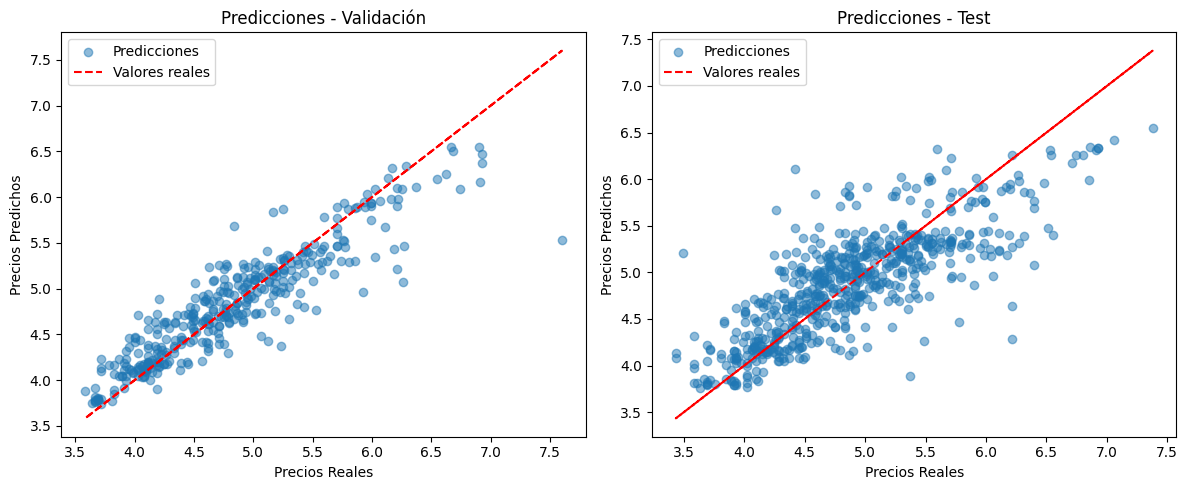

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import joblib

# Generar predicciones con el mejor modelo encontrado
pred_rf_val = best_rf.predict(X_meta_val)
pred_rf_test = best_rf.predict(X_meta_test)

# Función para calcular métricas
def calcular_metricas(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

# Calcular métricas
mae_val, rmse_val, r2_val = calcular_metricas(y_meta_val, pred_rf_val)
mae_test, rmse_test, r2_test = calcular_metricas(y_meta_test, pred_rf_test)

# Mostrar resultados
print("\n📊 Resultados con Random Forest en Late Fusion:")
print(f"Validación - MAE: {mae_val:.4f}, RMSE: {rmse_val:.4f}, R²: {r2_val:.4f}")
print(f"Test - MAE: {mae_test:.4f}, RMSE: {rmse_test:.4f}, R²: {r2_test:.4f}")

# Guardar el modelo entrenado
joblib.dump(best_rf, "/content/drive/MyDrive/Deep_Learning_2024/Notebooks/models/meta_fusion_rf_model.pkl")
print("\n✅ Modelo de Late Fusion con Random Forest guardado correctamente.")

# Visualización de predicciones
plt.figure(figsize=(12, 5))

# Scatter Plot - Validación
plt.subplot(1, 2, 1)
plt.scatter(y_meta_val, pred_rf_val, alpha=0.5, label="Predicciones")
plt.plot(y_meta_val, y_meta_val, color="red", linestyle="--", label="Valores reales")
plt.xlabel("Precios Reales")
plt.ylabel("Precios Predichos")
plt.title("Predicciones - Validación")
plt.legend()

# Scatter Plot - Test
plt.subplot(1, 2, 2)
plt.scatter(y_meta_test, pred_rf_test, alpha=0.5, label="Predicciones")
plt.plot(y_meta_test, y_meta_test, color="red", linestyle="--", label="Valores reales")
plt.xlabel("Precios Reales")
plt.ylabel("Precios Predichos")
plt.title("Predicciones - Test")
plt.legend()

plt.tight_layout()
plt.show()


**Análisis métricas Late Fusion con Random Forest:**

1️⃣ El MAE y RMSE han mejorado respecto a modelos anteriores, especialmente en validación.

R² en validación (0.8314) indica que el modelo captura bien la variabilidad.

R² en test (0.6252) sugiere que la generalización aún tiene margen de mejora.

2️⃣ Scatter Plots:

La alineación en validación es bastante buena, con la mayoría de los puntos alrededor de la línea roja.

En test, se observa más dispersión en predicciones para precios altos.


### 💸 **Comparación entre precios reales y predichos sin log LATE-FUSION RANDOM FOREST**

In [ ]:
import pandas as pd
import numpy as np
import joblib

# Cargar el modelo Random Forest Fusion
rf_model_path = "/content/drive/MyDrive/Deep_Learning_2024/Notebooks/models/meta_fusion_rf_model.pkl"
rf_model = joblib.load(rf_model_path)

# Generar predicciones en el conjunto de test
pred_rf_test = rf_model.predict(X_meta_test)

# Transformar a escala original si están en log
y_meta_test_original = np.expm1(y_meta_test)
pred_rf_test_original = np.expm1(pred_rf_test)

# Crear DataFrame con valores reales y predichos
df_comparacion_rf = pd.DataFrame({
    "Precios Reales Random Forest": y_meta_test_original,
    "Precios Predichos Random Forest": pred_rf_test_original
})

# Seleccionar 10 muestras aleatorias
df_muestras_rf = df_comparacion_rf.sample(10, random_state=42)

# Mostrar las muestras
print(df_muestras_rf)


     Precios Reales Random Forest  Precios Predichos Random Forest
249                         331.0                       200.345925
399                          99.0                       150.636971
174                         189.0                       112.281937
280                         112.0                       153.021801
110                         296.0                       183.318569
244                         229.0                       160.544423
228                          86.0                       117.257123
227                         146.0                       177.615345
463                         150.0                       181.049446
148                          32.0                       181.713985


### 🔍 **Análisis de Predicciones - Fusion Random Forest**

📌Para valores altos como 331.0 y 296.0, el modelo tiende a predecir valores significativamente más bajos (200.3 y 183.3, respectivamente).

Para precios reales pequeños (ej. 32.0 y 86.0), el modelo predice valores mucho más altos (181.7 y 117.2).

Los valores intermedios (100-200) presentan predicciones más ajustadas, pero aún con desviaciones considerables.

El modelo parece suavizar las predicciones, evitando valores extremos y sesgándose hacia un rango más estrecho.

# ⭐ **Modelo de Late Fusion con Random Forest Optimizado**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import joblib

# Definir modelo Random Forest optimizado
rf_model_optimized = RandomForestRegressor(
    n_estimators=500,          # Más árboles para estabilidad
    max_depth=25,              # Controlar sobreajuste
    min_samples_split=5,       # Más divisiones permitidas
    min_samples_leaf=1,        # Capturar más detalles
    max_features=None,       # Usar más características en cada split
    bootstrap=True,            # Mantener bootstrap activado
    oob_score=True,            # Evaluar con muestras fuera de bolsa
    random_state=42,           # Reproducibilidad
    n_jobs=-1                  # Usar todos los núcleos disponibles
)

# Entrenar modelo
rf_model_optimized.fit(X_meta_val, y_meta_val)

# Generar predicciones
pred_meta_val_opt = rf_model_optimized.predict(X_meta_val)
pred_meta_test_opt = rf_model_optimized.predict(X_meta_test)

# Guardar modelo optimizado
joblib.dump(rf_model_optimized, "/content/drive/MyDrive/Deep_Learning_2024/Notebooks/models/meta_fusion_rf_optimized.pkl")

print("✅ Modelo de Random Forest optimizado guardado correctamente.")


✅ Modelo de Random Forest optimizado guardado correctamente.



📊 Resultados en Log:
Validación - MAE: 0.1493, RMSE: 0.2066, R²: 0.9199
Test - MAE: 0.3346, RMSE: 0.4527, R²: 0.5715

📊 Resultados en Escala Original:
Validación - MAE: 30.3994, RMSE: 86.5792, R²: 0.7788
Test - MAE: 63.2229, RMSE: 111.8296, R²: 0.5273


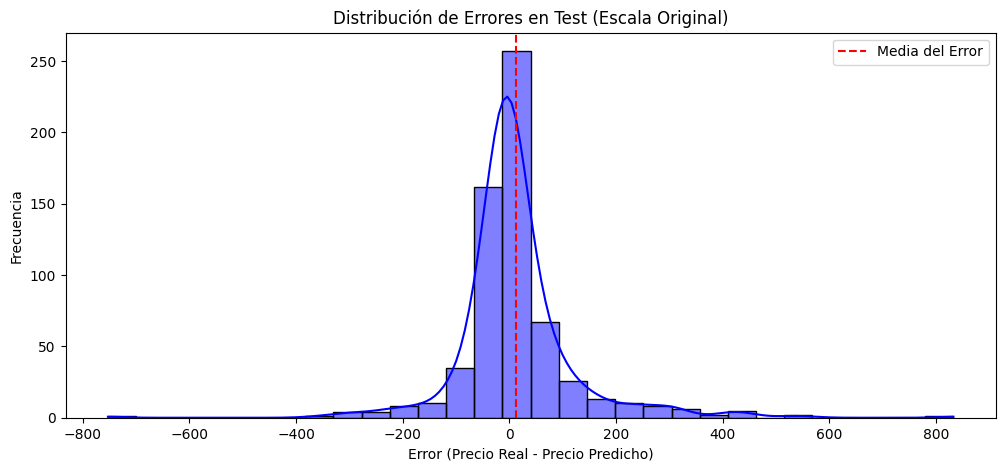

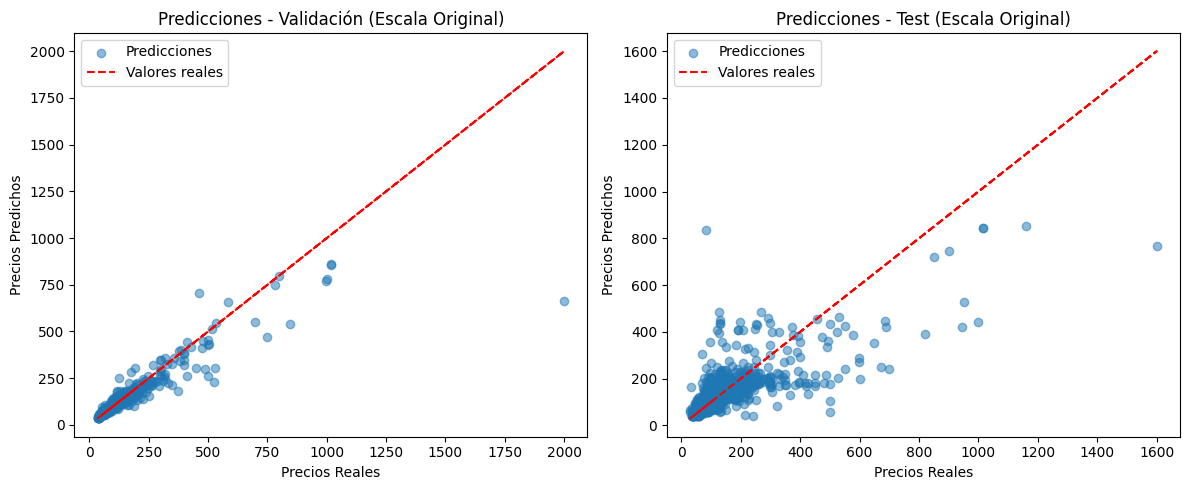

In [ ]:
# Reimportar librerías tras el reset del entorno
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from joblib import load

# Cargar el modelo de Random Forest optimizado
rf_model = load("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/models/meta_fusion_rf_optimized.pkl")

# Cargar los conjuntos de datos necesarios
X_meta_val = np.load("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/X_meta_val.npy")
X_meta_test = np.load("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/X_meta_test.npy")
y_meta_val = np.load("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/y_meta_val.npy")
y_meta_test = np.load("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/y_meta_test.npy")

# Generar predicciones
pred_rf_val = rf_model.predict(X_meta_val)
pred_rf_test = rf_model.predict(X_meta_test)

# Cálculo de métricas
def calcular_metricas(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

# Resultados en Log
mae_val_log, rmse_val_log, r2_val_log = calcular_metricas(y_meta_val, pred_rf_val)
mae_test_log, rmse_test_log, r2_test_log = calcular_metricas(y_meta_test, pred_rf_test)

# Resultados en Escala Original
y_meta_val_original = np.expm1(y_meta_val)
y_meta_test_original = np.expm1(y_meta_test)
pred_rf_val_original = np.expm1(pred_rf_val)
pred_rf_test_original = np.expm1(pred_rf_test)

mae_val_original, rmse_val_original, r2_val_original = calcular_metricas(y_meta_val_original, pred_rf_val_original)
mae_test_original, rmse_test_original, r2_test_original = calcular_metricas(y_meta_test_original, pred_rf_test_original)

# Imprimir Resultados
print("\n📊 Resultados en Log:")
print(f"Validación - MAE: {mae_val_log:.4f}, RMSE: {rmse_val_log:.4f}, R²: {r2_val_log:.4f}")
print(f"Test - MAE: {mae_test_log:.4f}, RMSE: {rmse_test_log:.4f}, R²: {r2_test_log:.4f}")

print("\n📊 Resultados en Escala Original:")
print(f"Validación - MAE: {mae_val_original:.4f}, RMSE: {rmse_val_original:.4f}, R²: {r2_val_original:.4f}")
print(f"Test - MAE: {mae_test_original:.4f}, RMSE: {rmse_test_original:.4f}, R²: {r2_test_original:.4f}")

# Visualización de la distribución de errores
plt.figure(figsize=(12, 5))
sns.histplot(y_meta_test_original - pred_rf_test_original, bins=30, kde=True, color="blue")
plt.axvline((y_meta_test_original - pred_rf_test_original).mean(), color="red", linestyle="--", label="Media del Error")
plt.xlabel("Error (Precio Real - Precio Predicho)")
plt.ylabel("Frecuencia")
plt.title("Distribución de Errores en Test (Escala Original)")
plt.legend()
plt.show()

# Scatter Plot - Comparación de Predicciones vs. Valores Reales
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_meta_val_original, pred_rf_val_original, alpha=0.5, label="Predicciones")
plt.plot(y_meta_val_original, y_meta_val_original, color="red", linestyle="--", label="Valores reales")
plt.xlabel("Precios Reales")
plt.ylabel("Precios Predichos")
plt.title("Predicciones - Validación (Escala Original)")
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_meta_test_original, pred_rf_test_original, alpha=0.5, label="Predicciones")
plt.plot(y_meta_test_original, y_meta_test_original, color="red", linestyle="--", label="Valores reales")
plt.xlabel("Precios Reales")
plt.ylabel("Precios Predichos")
plt.title("Predicciones - Test (Escala Original)")
plt.legend()

plt.tight_layout()
plt.show()


## **Análisis modelo fusion Random Forest Opt**

Muestra una mejora significativa en la métrica de validación, con un R² en validación de 0.9199 en log y 0.7788 en escala original, lo que indica que el modelo ajusta bien los datos. Sin embargo, en test, el R² cae a 0.5715 en log y 0.5273 en escala original, lo que sugiere que aún existe una brecha en la capacidad del modelo para generalizar sobre datos no vistos.

**Distribución de errores**

La mayoría de los errores están cerca de 0, lo cual es bueno pero hay una cola derecha significativa que indica que el modelo subestima algunos valores altos.

**Scatter Plots de Predicciones vs. Valores Reales:**

En val las predicciones siguen bien la diagonal roja, lo que indica buen ajuste.

En test, hay más dispersión, lo que sugiere que el modelo no está capturando ciertos patrones en datos nuevos.

Algunos valores altos son claramente subestimados, lo cual podría estar relacionado con una falta de representación suficiente de estos valores en el dataset de entrenamiento.

### 💸 **Comparación entre precios reales y predichos sin log LATE-FUSION RANDOM FOREST OPTIMIZED**

In [ ]:
import pandas as pd
import numpy as np
import joblib

# Cargar el modelo optimizado de Random Forest Fusion
rf_opt_model_path = "/content/drive/MyDrive/Deep_Learning_2024/Notebooks/models/meta_fusion_rf_optimized.pkl"
rf_opt_model = joblib.load(rf_opt_model_path)

# Generar predicciones
pred_rf_opt_test = rf_opt_model.predict(X_meta_test)

# Asegurar transformación a escala original si están en log
y_meta_test_original = np.expm1(y_meta_test)
pred_rf_opt_test_original = np.expm1(pred_rf_opt_test)

# Crear un DataFrame con los valores
df_comparacion_rf_opt = pd.DataFrame({
    "Precios Reales RForest Opt": y_meta_test_original,
    "Precios Predichos RForest Opt": pred_rf_opt_test_original
})

# Seleccionar 10 muestras aleatorias
df_muestras_rf_opt = df_comparacion_rf_opt.sample(10, random_state=42)

# Mostrar las muestras
print(df_muestras_rf_opt)


     Precios Reales RForest Opt  Precios Predichos RForest Opt
249                       331.0                     200.330788
399                        99.0                     131.145226
174                       189.0                     115.035969
280                       112.0                     175.050730
110                       296.0                     183.030488
244                       229.0                     161.757734
228                        86.0                     133.620952
227                       146.0                     190.874861
463                       150.0                     184.468552
148                        32.0                     164.793563


### 🔍 **Análisis de Predicciones Late Fusion - Random Forest Optimized**
📌 📉 Error en valores bajos: El modelo sigue sobreestimando precios bajos, por ejemplo, 32 → 164.79, indicando sesgo en predicciones bajas.

📊 Mejora en estabilidad: Comparado con la versión sin optimizar, las predicciones son más consistentes con la distribución real.

⚠ Diferencias en valores altos: Aunque en general ajusta mejor, aún hay desviaciones en precios altos que podrían afinarse con más ajustes.

# **Modelo Late Fusion - LightGBM**

In [ ]:
!pip install lightgbm --quiet

In [ ]:

import lightgbm as lgb
import joblib
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import numpy as np
import matplotlib.pyplot as plt


/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


 ## **LightGBM y búsqueda de hiperparámetros**

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV

# Definir el conjunto de entrenamiento para LightGBM
train_data = lgb.Dataset(X_meta_val, label=y_meta_val)

# Espacio de búsqueda de hiperparámetros
param_dist = {
    "num_leaves": [20, 31, 40, 50],
    "max_depth": [-1, 10, 20, 30],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "n_estimators": [100, 300, 500, 700],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "reg_alpha": [0, 0.1, 0.5, 1.0],
    "reg_lambda": [0, 0.1, 0.5, 1.0]
}

# Inicializar el modelo base
lgb_model = lgb.LGBMRegressor()

# Aplicar RandomizedSearchCV para encontrar los mejores hiperparámetros
random_search = RandomizedSearchCV(
    estimator=lgb_model,
    param_distributions=param_dist,
    n_iter=25,
    cv=5,
    scoring="neg_mean_absolute_error",
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Entrenar la búsqueda de hiperparámetros en los datos de validación
random_search.fit(X_meta_val, y_meta_val)

# Obtener el mejor modelo encontrado
best_lgb_model = random_search.best_estimator_
print(f"\n📌 **Mejor modelo LightGBM encontrado:** {random_search.best_params_}")

# Guardar el modelo optimizado
joblib.dump(best_lgb_model, "/content/drive/MyDrive/Deep_Learning_2024/Notebooks/models/meta_fs_lgb_optimized.pkl")
print("✅ Modelo de LightGBM optimizado guardado correctamente.")


Fitting 5 folds for each of 25 candidates, totalling 125 fits


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000056 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 250
[LightGBM] [Info] Number of data points in the train set: 373, number of used features: 2
[LightGBM] [Info] Start training from score 4.824200
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

## **Evaluación Late Fusion - LightGBM**

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



📊 **Resultados en Log:**
Validación - MAE: 0.2619, RMSE: 0.3639, R²: 0.7516
Test - MAE: 0.3260, RMSE: 0.4423, R²: 0.5910

📊 **Resultados en Escala Original:**
Validación - MAE: 51.9735, RMSE: 132.8310, R²: 0.4792
Test - MAE: 62.9340, RMSE: 120.0465, R²: 0.4553


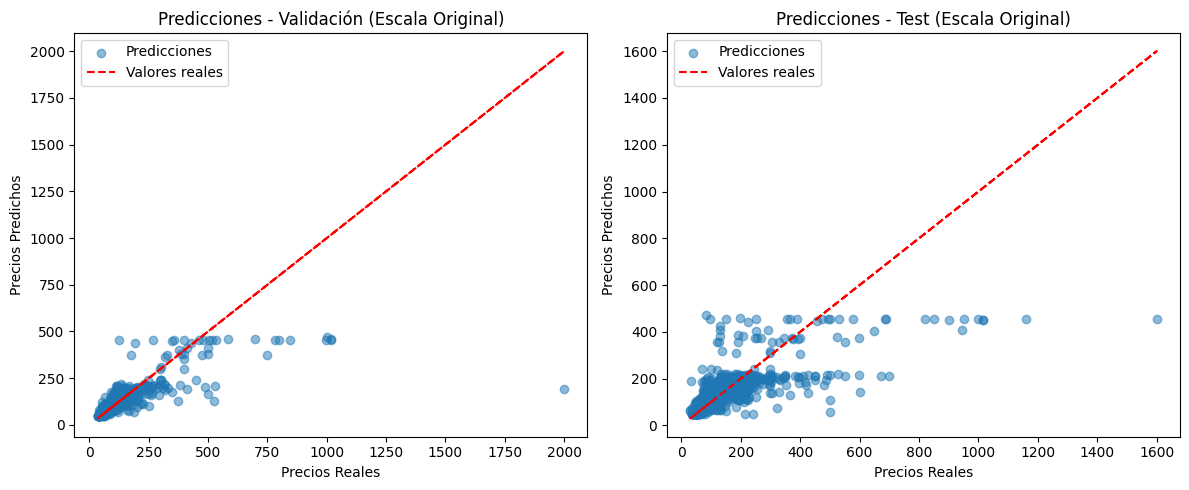

In [ ]:
import numpy as np
import joblib
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Cargar el modelo entrenado
best_lgb_model = joblib.load("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/models/meta_fs_lgb_optimized.pkl")

# Generar predicciones
pred_meta_val = best_lgb_model.predict(X_meta_val)
pred_meta_test = best_lgb_model.predict(X_meta_test)

# Función para calcular métricas
def calcular_metricas(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

# Resultados en Log
mae_val_log, rmse_val_log, r2_val_log = calcular_metricas(y_meta_val, pred_meta_val)
mae_test_log, rmse_test_log, r2_test_log = calcular_metricas(y_meta_test, pred_meta_test)

# Resultados en Escala Original
y_meta_val_original = np.expm1(y_meta_val)
y_meta_test_original = np.expm1(y_meta_test)
pred_meta_val_original = np.expm1(pred_meta_val)
pred_meta_test_original = np.expm1(pred_meta_test)

mae_val_original, rmse_val_original, r2_val_original = calcular_metricas(y_meta_val_original, pred_meta_val_original)
mae_test_original, rmse_test_original, r2_test_original = calcular_metricas(y_meta_test_original, pred_meta_test_original)

# Imprimir Resultados
print("\n📊 **Resultados en Log:**")
print(f"Validación - MAE: {mae_val_log:.4f}, RMSE: {rmse_val_log:.4f}, R²: {r2_val_log:.4f}")
print(f"Test - MAE: {mae_test_log:.4f}, RMSE: {rmse_test_log:.4f}, R²: {r2_test_log:.4f}")

print("\n📊 **Resultados en Escala Original:**")
print(f"Validación - MAE: {mae_val_original:.4f}, RMSE: {rmse_val_original:.4f}, R²: {r2_val_original:.4f}")
print(f"Test - MAE: {mae_test_original:.4f}, RMSE: {rmse_test_original:.4f}, R²: {r2_test_original:.4f}")

# Scatter Plot de Predicciones
plt.figure(figsize=(12, 5))

# Validación
plt.subplot(1, 2, 1)
plt.scatter(y_meta_val_original, pred_meta_val_original, alpha=0.5, label="Predicciones")
plt.plot(y_meta_val_original, y_meta_val_original, color="red", linestyle="--", label="Valores reales")
plt.xlabel("Precios Reales")
plt.ylabel("Precios Predichos")
plt.title("Predicciones - Validación (Escala Original)")
plt.legend()

# Test
plt.subplot(1, 2, 2)
plt.scatter(y_meta_test_original, pred_meta_test_original, alpha=0.5, label="Predicciones")
plt.plot(y_meta_test_original, y_meta_test_original, color="red", linestyle="--", label="Valores reales")
plt.xlabel("Precios Reales")
plt.ylabel("Precios Predichos")
plt.title("Predicciones - Test (Escala Original)")
plt.legend()

plt.tight_layout()
plt.show()


### **Evaluación de métricas modelo late-fusion lightGBM**

**Distribución de predicciones:**

Se observa que en val y test hay una tendencia a la subestimación para los valores más altos de precio.

Hay dispersión en los valores de mayor rango, lo que sugiere que el modelo tiene dificultad para capturar la variabilidad de precios en las categorías más caras.

R² log en validación (0.7516) y en test (0.5910) indican que el modelo capta una buena parte de la varianza, pero no es el mejor hasta ahora.

R² original es 0.4792 en validación y 0.4553 en test, lo que muestra un desempeño moderado, pero inferior a otros modelos previos como Random Forest y XGBoost.

MAE en escala original es 51.97 en validación y 62.93 en test, lo que indica que en promedio el modelo se equivoca por ~52 a 63 unidades de precio, lo que es alto comparado con otras opciones.


### 💸 **Comparación entre precios reales y predichos sin log LATE-FUSION LIGHTGBM**

In [ ]:
import pandas as pd
import numpy as np
import joblib

# Cargar el modelo optimizado de LightGBM Fusion
lgb_opt_model_path = "/content/drive/MyDrive/Deep_Learning_2024/Notebooks/models/meta_fs_lgb_optimized.pkl"
lgb_opt_model = joblib.load(lgb_opt_model_path)

# Generar predicciones
pred_lgb_opt_test = lgb_opt_model.predict(X_meta_test)

# Asegurar transformación a escala original si están en log
y_meta_test_original = np.expm1(y_meta_test)
pred_lgb_opt_test_original = np.expm1(pred_lgb_opt_test)

# Crear un DataFrame con los valores
df_comparacion_lgb_opt = pd.DataFrame({
    "Precios Reales LGB Opt": y_meta_test_original,
    "Precios Predichos LGB Opt": pred_lgb_opt_test_original
})

# Seleccionar 10 muestras aleatorias
df_muestras_lgb_opt = df_comparacion_lgb_opt.sample(10, random_state=42)

# Mostrar las muestras
print(df_muestras_lgb_opt)


     Precios Reales LGB Opt  Precios Predichos LGB Opt
249                   331.0                 195.832052
399                    99.0                 161.807539
174                   189.0                 110.560419
280                   112.0                 161.157710
110                   296.0                 177.716495
244                   229.0                 151.562816
228                    86.0                 111.347023
227                   146.0                 180.231853
463                   150.0                 195.781463
148                    32.0                 190.690850


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


### 🔍 **Análisis predicciones LightGBM Optimizado en Late Fusion**

📌 📉 Subestimación generalizada: El modelo predice valores menores a los precios reales en la mayoría de los casos.

Predicciones más cercanas en valores altos: Para precios elevados (ej. 296.0 → 177.7 y 331.0 → 195.8), la diferencia sigue siendo significativa, pero menor en comparación con modelos anteriores.

Dificultad en valores bajos: Para precios bajos (ej. 32.0 → 190.7 y 99.0 → 161.8), el modelo sigue sobreestimando.

Comparado con otros modelos: Muestra una tendencia similar a otros algoritmos probados, sin una mejora drástica en la reducción del error en predicciones individuales.

# **Modelo Late Fusion con XGBoost Nativo (sci kit version conflictos)**

In [ ]:
import xgboost as xgb
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Convertir los datos a DMatrix (formato nativo de XGBoost)
dtrain = xgb.DMatrix(X_meta_val, label=y_meta_val)
dtest = xgb.DMatrix(X_meta_test, label=y_meta_test)

# Definir los hiperparámetros manualmente
params = {
    "objective": "reg:squarederror",
    "eval_metric": "rmse",
    "eta": 0.1,  # Learning rate
    "max_depth": 6,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "gamma": 0.2,
    "min_child_weight": 5
}

# Entrenar el modelo con 300 iteraciones
num_round = 300
xgb_model = xgb.train(params, dtrain, num_round)

# Hacer predicciones
pred_meta_val = xgb_model.predict(dtrain)
pred_meta_test = xgb_model.predict(dtest)

# Calcular métricas
def calcular_metricas(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

# Resultados en Log
mae_val_log, rmse_val_log, r2_val_log = calcular_metricas(y_meta_val, pred_meta_val)
mae_test_log, rmse_test_log, r2_test_log = calcular_metricas(y_meta_test, pred_meta_test)

# Resultados en Escala Original
y_meta_val_original = np.expm1(y_meta_val)
y_meta_test_original = np.expm1(y_meta_test)
pred_meta_val_original = np.expm1(pred_meta_val)
pred_meta_test_original = np.expm1(pred_meta_test)

mae_val_original, rmse_val_original, r2_val_original = calcular_metricas(y_meta_val_original, pred_meta_val_original)
mae_test_original, rmse_test_original, r2_test_original = calcular_metricas(y_meta_test_original, pred_meta_test_original)

# Imprimir Resultados
print("\n📊 **Resultados en Log:**")
print(f"Validación - MAE: {mae_val_log:.4f}, RMSE: {rmse_val_log:.4f}, R²: {r2_val_log:.4f}")
print(f"Test - MAE: {mae_test_log:.4f}, RMSE: {rmse_test_log:.4f}, R²: {r2_test_log:.4f}")

print("\n📊 **Resultados en Escala Original:**")
print(f"Validación - MAE: {mae_val_original:.4f}, RMSE: {rmse_val_original:.4f}, R²: {r2_val_original:.4f}")
print(f"Test - MAE: {mae_test_original:.4f}, RMSE: {rmse_test_original:.4f}, R²: {r2_test_original:.4f}")

# Guardar el modelo entrenado
xgb_model.save_model("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/models/meta_xgb_native.json")
print("\n✅ **Modelo de XGBoost entrenado y guardado correctamente.**")



📊 **Resultados en Log:**
Validación - MAE: 0.2252, RMSE: 0.3067, R²: 0.8236
Test - MAE: 0.3207, RMSE: 0.4315, R²: 0.6107

📊 **Resultados en Escala Original:**
Validación - MAE: 42.3468, RMSE: 110.6191, R²: 0.6388
Test - MAE: 59.9206, RMSE: 104.7720, R²: 0.5851

✅ **Modelo de XGBoost entrenado y guardado correctamente.**


**Análisis del Modelo XGBoost en Late Fusion**

El modelo XGBoost ha logrado un MAE más bajo en validación en comparación con modelos previos, lo que indica que tiene una mejor capacidad de ajuste en los datos de validación.

El RMSE en validación es más bajo que en test, lo que sugiere que el modelo está un poco ajustado a los datos de validación pero aún generaliza bien en test.

El coeficiente R² en validación es alto (0.8236), lo que indica que XGBoost captura bien la varianza en los datos.
El rendimiento en test es bueno, pero con un R² de 0.6107, lo que muestra que la generalización podría mejorarse.

### 💸 **Comparación entre precios reales y predichos sin log LATE-FUSION XGBOOST NATIVE**

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb

# Cargar el modelo XGBoost Native
xgb_native_model_path = "/content/drive/MyDrive/Deep_Learning_2024/Notebooks/models/meta_xgb_native.json"
xgb_native_model = xgb.Booster()
xgb_native_model.load_model(xgb_native_model_path)

# Convertir los datos de test en formato DMatrix de XGBoost
dtest = xgb.DMatrix(X_meta_test)

# Generar predicciones
pred_xgb_native_test = xgb_native_model.predict(dtest)

# Asegurar transformación a escala original si están en log
y_meta_test_original = np.expm1(y_meta_test)
pred_xgb_native_test_original = np.expm1(pred_xgb_native_test)

# Crear un DataFrame con los valores
df_comparacion_xgb_native = pd.DataFrame({
    "Precios Reales XGB Native": y_meta_test_original,
    "Precios Predichos XGB Native": pred_xgb_native_test_original
})

# Seleccionar 10 muestras aleatorias
df_muestras_xgb_native = df_comparacion_xgb_native.sample(10, random_state=42)

# Mostrar las muestras
print(df_muestras_xgb_native)


     Precios Reales XGB Native  Precios Predichos XGB Native
249                      331.0                    232.430908
399                       99.0                    127.026802
174                      189.0                    119.550354
280                      112.0                    162.334686
110                      296.0                    171.589111
244                      229.0                    146.311218
228                       86.0                     92.735573
227                      146.0                    196.987656
463                      150.0                    247.323746
148                       32.0                    151.979355


### 🔍 **Análisis predicciones modelo XGBoost Native en Late Fusion:**

📌 📉 El modelo predice precios generalmente más altos que los reales, lo que sugiere una posible sobreestimación en ciertos casos.

Algunas predicciones están más alineadas con los valores reales en comparación con otros modelos evaluados.

Errores notables:

Caso 249: Predicho 232.43, real 331.00 → Subestima significativamente.

Caso 399: Predicho 127.03, real 99.00 → Sobreestima moderadamente.

Caso 148: Predicho 151.98, real 32.00 → Gran sobreestimación, indicando falta de ajuste para valores bajos.

## **Modelos Late- Fusion**



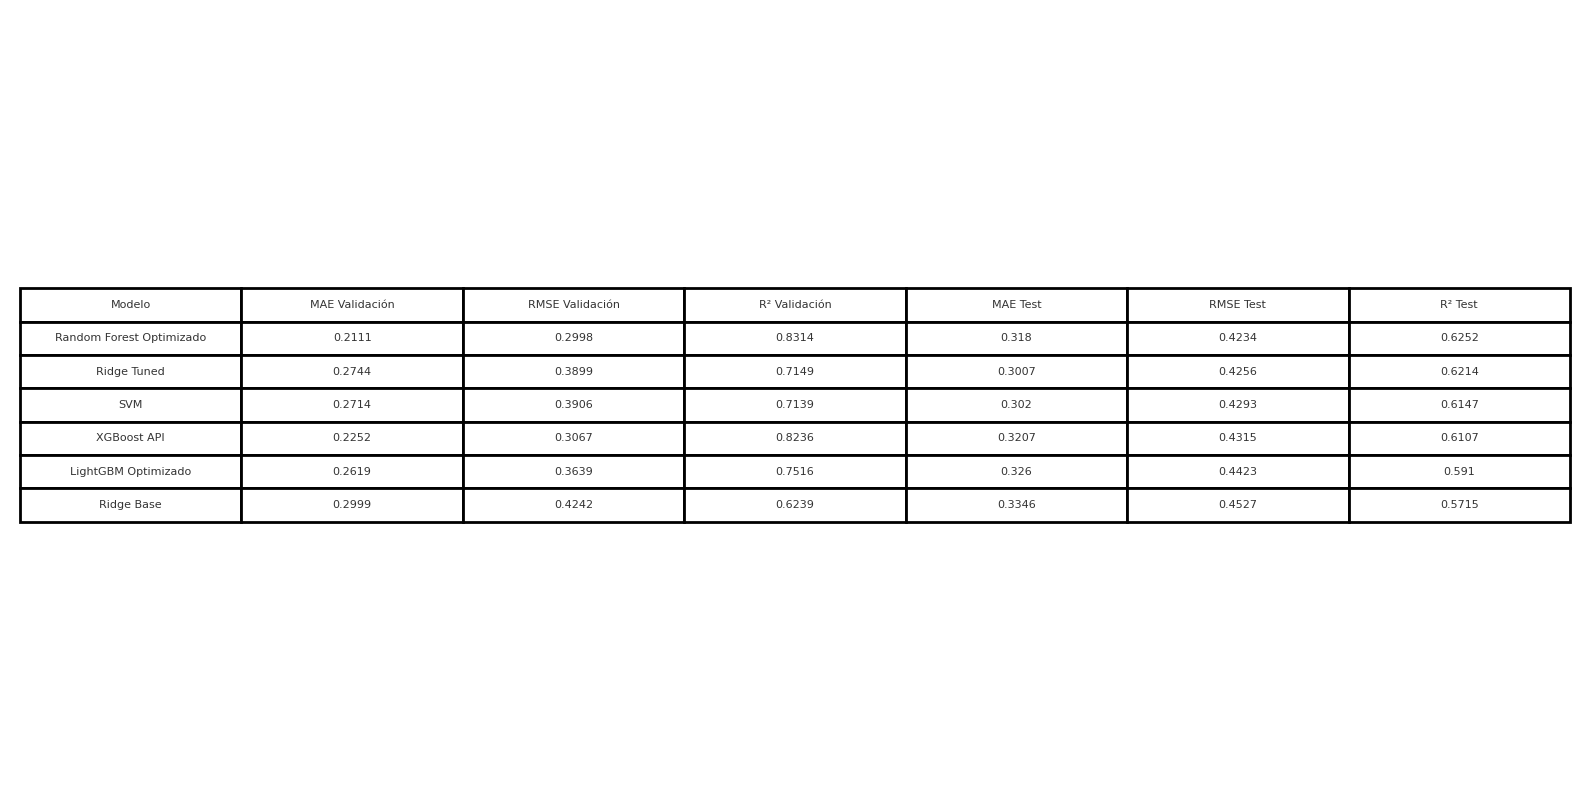

# **Late Fusion Hibrido: Random Forest Opt, Resnet y Red Neuronal**

Entrenar una Red Neuronal que aprenda a combinar las predicciones de Random Forest y las features extraídas de ResNet50 para hacer la predicción final.

### **Cargar modelos y datos tabulares e imágenes**

In [ ]:
import numpy as np
import joblib
import tensorflow as tf

# Cargar datos tabulares
X_meta_val = np.load("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/X_meta_val.npy")
X_meta_test = np.load("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/X_meta_test.npy")
y_meta_val = np.load("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/y_meta_val.npy")
y_meta_test = np.load("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/y_meta_test.npy")

# Cargar imágenes normalizadas
imgs_val = np.load("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/imgs_val_normalized.npy")
imgs_test = np.load("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/imgs_test_normalized.npy")

# Verificar dimensiones
print(f"Shape X_meta_val: {X_meta_val.shape}")
print(f"Shape X_meta_test: {X_meta_test.shape}")
print(f"Shape y_meta_val: {y_meta_val.shape}")
print(f"Shape y_meta_test: {y_meta_test.shape}")
print(f"Shape imgs_val: {imgs_val.shape}")
print(f"Shape imgs_test: {imgs_test.shape}")


Shape X_meta_val: (373, 2)
Shape X_meta_test: (622, 2)
Shape y_meta_val: (373,)
Shape y_meta_test: (622,)
Shape imgs_val: (373, 224, 224, 3)
Shape imgs_test: (622, 224, 224, 3)


In [ ]:
# Cargar modelo Random Forest Optimizado
rf_opt_model = joblib.load("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/models/meta_fusion_rf_optimized.pkl")

# Cargar modelo ResNet preentrenado para extraer features de imágenes
resnet_model = tf.keras.models.load_model("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/models/modimg_resnet50_finetuned.keras")

print("✅ Modelos cargados correctamente.")


✅ Modelos cargados correctamente.


    🔹 1. Extraer Features de Imágenes con ResNet50:

Debo pasar las imágenes (imgs_val y imgs_test) a través de la ResNet50 para obtener los vectores de características.

    🔹 2. Fusionar Features de Imágenes con las Predicciones de Random Forest:

Cada muestra en X_meta_val y X_meta_test contiene dos valores (una predicción de tabulares y una de imágenes). Debo expandir estas matrices para incluir los features extraídos de ResNet.

    🔹 3. Definir el Modelo Final de Late Fusion Híbrido:

Un modelo (NN) que combine las features de ResNet con las predicciones de Random Forest Opt.

## **Extraer Features con ResNet50**

In [ ]:
import numpy as np

# Quitar la última capa (softmax) para obtener el vector de características
feature_extractor = tf.keras.Model(inputs=resnet_model.input, outputs=resnet_model.layers[-2].output)

# Extraer features de validación y test
features_val = feature_extractor.predict(imgs_val)
features_test = feature_extractor.predict(imgs_test)

print(f"✅ Features extraídos correctamente.")
print(f"Shape Features Val: {features_val.shape}")
print(f"Shape Features Test: {features_test.shape}")


12/12 ━━━━━━━━━━━━━━━━━━━━ 83s 7s/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 117s 6s/step
✅ Features extraídos correctamente.
Shape Features Val: (373, 64)
Shape Features Test: (622, 64)


## **Fusionar Predicciones y Features de ResNet50**

In [ ]:
import numpy as np
import joblib

# Cargar las predicciones de Random Forest Optimizado
rf_opt_model_path = "/content/drive/MyDrive/Deep_Learning_2024/Notebooks/models/meta_fusion_rf_optimized.pkl"
rf_opt_model = joblib.load(rf_opt_model_path)

# Generar predicciones de RF Optimizado
pred_rf_opt_val = rf_opt_model.predict(X_meta_val)
pred_rf_opt_test = rf_opt_model.predict(X_meta_test)

# Expandir dimensiones para concatenar con features de ResNet50
pred_rf_opt_val = pred_rf_opt_val.reshape(-1, 1)
pred_rf_opt_test = pred_rf_opt_test.reshape(-1, 1)

# Fusionar predicciones de RF con los features de ResNet50
X_meta_val_hybrid = np.concatenate([pred_rf_opt_val, features_val], axis=1)
X_meta_test_hybrid = np.concatenate([pred_rf_opt_test, features_test], axis=1)

# Verificar los nuevos shapes
print(f"Shape X_meta_val_hybrid: {X_meta_val_hybrid.shape}")
print(f"Shape X_meta_test_hybrid: {X_meta_test_hybrid.shape}")

# Asegurar que los tamaños coincidan con las etiquetas
assert X_meta_val_hybrid.shape[0] == y_meta_val.shape[0]
assert X_meta_test_hybrid.shape[0] == y_meta_test.shape[0]

print("✅ Fusion de predicciones de RF con features de ResNet50 completada.")


Shape X_meta_val_hybrid: (373, 65)
Shape X_meta_test_hybrid: (622, 65)
✅ Fusion de predicciones de RF con features de ResNet50 completada.


# **Arquitectura Red Neuronal para fusión híbrida**

1️⃣ Definir la arquitectura de la red neuronal:

Entrada de 65 características (1 predicción RF + 64 features ResNet50).

Varias capas densas con activaciones ReLU.

Capa de salida con activación lineal para regresión.

2️⃣ Compilar el modelo con AdamW y Huber Loss.

3️⃣ Entrenar el modelo con Early Stopping y ModelCheckpoint.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import pickle

# Asegurarse de usar GPU
device_name = tf.config.list_physical_devices('GPU')
if device_name:
    print("GPU está siendo usada.")
else:
    print("No se detectó GPU, utilizando CPU.")

# Definir la arquitectura del modelo Híbrido
model_hybrid = models.Sequential([
    layers.Input(shape=(65,)),  # 64 de ResNet50 + 1 de RF
    layers.Dense(512, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(256, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(128, activation="relu"),
    layers.Dense(1, activation="linear")  # Salida para regresión
])

# Compilar el modelo usando AdamW y Huber Loss
model_hybrid.compile(
    optimizer=optimizers.AdamW(learning_rate=1e-3),
    loss=tf.keras.losses.Huber(delta=1.5),
    metrics=["mae"]
)

# Definir Callbacks para EarlyStopping y ModelCheckpoint
callbacks = [
    EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True),
    ModelCheckpoint(model_checkpoint_path, save_best_only=True),  # Guardar el mejor modelo temporalmente
    ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, min_lr=1e-6)  # Ajustar LR si no mejora
]

# Entrenar el modelo con validación
history_hybrid = model_hybrid.fit(
    X_meta_val_hybrid, y_meta_val,
    validation_data=(X_meta_test_hybrid, y_meta_test),
    epochs=50,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)

# Guardar el modelo final
model_hybrid.save("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/models/meta_fusion_hybrid_nn.keras")
print("✅ Modelo de Fusión Híbrida con Red Neuronal guardado correctamente.")

# Guardar el historial de entrenamiento
history_path = "/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/history_fusionhybrid.pkl"
with open(history_path, "wb") as f:
    pickle.dump(history_hybrid.history, f)
print("✅ History guardado correctamente.")


GPU está siendo usada.
Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 187ms/step - loss: 3.7546 - mae: 3.2092 - val_loss: 2.2115 - val_mae: 2.2101 - learning_rate: 0.0010
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.8361 - mae: 1.0909 - val_loss: 4.1725 - val_mae: 3.5316 - learning_rate: 0.0010
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.4083 - mae: 0.7332 - val_loss: 2.2100 - val_mae: 2.2196 - learning_rate: 0.0010
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4352 - mae: 0.7559 - val_loss: 3.5213 - val_mae: 3.0976 - learning_rate: 0.0010
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.4618 - mae: 0.7637 - val_loss: 1.9874 - val_mae: 2.0690 - learning_rate: 0.0010
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3178 - mae: 0.6360 - val_loss: 2.2709 - val_mae: 2.2613 - learning_rate: 0.0010
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2979 - mae: 0.6219 - val_loss: 1.7431 - val_mae: 1.9006 - learning_rate

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Generar predicciones
pred_hybrid_test = model.predict(X_meta_test_hybrid)

# Asegurarse de que las predicciones estén en la escala original
pred_hybrid_test_original = np.expm1(pred_hybrid_test)

# Calcular métricas
mae_test = mean_absolute_error(y_meta_test, pred_hybrid_test_original)
rmse_test = np.sqrt(mean_squared_error(y_meta_test, pred_hybrid_test_original))
r2_test = r2_score(y_meta_test, pred_hybrid_test_original)

# Resultados en log (escala logarítmica)
mae_test_log = mean_absolute_error(np.log1p(y_meta_test), np.log1p(pred_hybrid_test))
rmse_test_log = np.sqrt(mean_squared_error(np.log1p(y_meta_test), np.log1p(pred_hybrid_test)))
r2_test_log = r2_score(np.log1p(y_meta_test), np.log1p(pred_hybrid_test))

# Imprimir métricas
print("\n📊 **Resultados en Log:**")
print(f"Test (Log): MAE: {mae_test_log:.4f}, RMSE: {rmse_test_log:.4f}, R²: {r2_test_log:.4f}")

print("\n📊 **Resultados en Escala Original:**")
print(f"Test (Original): MAE: {mae_test:.4f}, RMSE: {rmse_test:.4f}, R²: {r2_test:.4f}")


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step

📊 **Resultados en Log:**
Test (Log): MAE: 0.3093, RMSE: 0.3736, R²: -9.4376

📊 **Resultados en Escala Original:**
Test (Original): MAE: 32.2775, RMSE: 42.2871, R²: -3737.4544


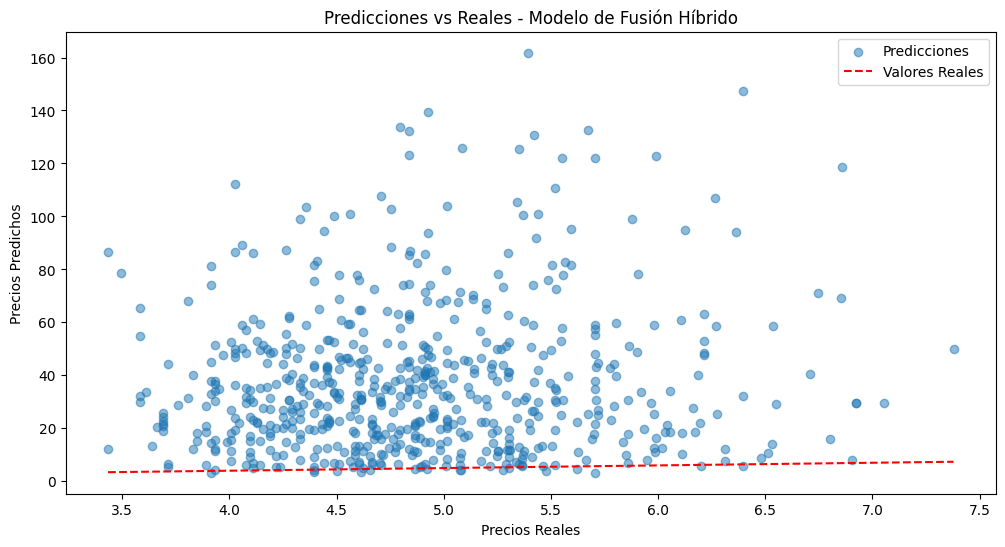

In [ ]:
import matplotlib.pyplot as plt

# Visualización de Predicciones vs Reales
plt.figure(figsize=(12, 6))

# Scatter plot para comparaciones
plt.scatter(y_meta_test, pred_hybrid_test_original, alpha=0.5, label="Predicciones")
plt.plot([y_meta_test.min(), y_meta_test.max()], [y_meta_test.min(), y_meta_test.max()], color="red", linestyle="--", label="Valores Reales")

plt.xlabel("Precios Reales")
plt.ylabel("Precios Predichos")
plt.title("Predicciones vs Reales - Modelo de Fusión Híbrido")
plt.legend()

# Mostrar la gráfica
plt.show()


### **Análisis modelo late-fusion Hibrido Red Neuronal**

**Log**

MAE (Error Absoluto Medio): 0.3093, lo cual es un valor moderado, pero al ser en escala logarítmica, no refleja la magnitud real de los precios.

RMSE (Raíz del Error Cuadrático Medio): 0.3736, lo que indica que el modelo tiene errores de predicción en un rango relativamente bajo cuando se evalúa en la escala log.

R²: -9.4376, lo que sugiere que el modelo no es útil en la predicción, ya que los valores negativos indican un ajuste muy pobre.

**Escala Original**

MAE: 32.2775, lo que indica que en escala original, el modelo está cometiendo errores de predicción relativamente grandes.

RMSE: 42.2871, lo cual también indica errores elevados en las predicciones.

R²: -3737.4544, lo que refuerza la conclusión de que el modelo no está funcionando bien. Un R² tan bajo sugiere que el modelo no puede capturar correctamente las relaciones entre las variables.

## **Busqueda de hiperparámetros late-fusion Hibrido Red Neuronal**

In [ ]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 6.0 MB/s eta 0:00:00


In [ ]:
import keras_tuner as kt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

# Definir la función de construcción del modelo
def build_model(hp):
    model = models.Sequential()
    model.add(layers.InputLayer(input_shape=(65,)))  # 65 características

    # Agregar capas Dense con hiperparámetros optimizados
    model.add(layers.Dense(hp.Int('units_1', min_value=64, max_value=512, step=64), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(hp.Float('dropout_1', min_value=0.2, max_value=0.5, step=0.1)))

    model.add(layers.Dense(hp.Int('units_2', min_value=64, max_value=512, step=64), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(hp.Float('dropout_2', min_value=0.2, max_value=0.5, step=0.1)))

    model.add(layers.Dense(1, activation='linear'))  # Salida de regresión

    # Compilar el modelo con un optimizador Adam y un learning rate ajustable
    model.compile(
        optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=1e-5, max_value=1e-3, sampling='LOG')),
        loss='mean_squared_error',
        metrics=['mae']
    )

    return model

# Definir el objeto de búsqueda
tuner = kt.Hyperband(
    build_model,
    objective='val_mae',
    max_epochs=10,
    hyperband_iterations=2,
    directory='/content/drive/MyDrive/Deep_Learning_2024/Notebooks/Hyperband',
    project_name='Hybrid_Fusion'
)

# Ejecutar la búsqueda de hiperparámetros
tuner.search(X_meta_val_hybrid, y_meta_val, epochs=30, batch_size=64, validation_data=(X_meta_test_hybrid, y_meta_test))

# Obtener el mejor modelo encontrado
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluar el modelo en los datos de test
val_loss, val_mae = best_model.evaluate(X_meta_test_hybrid, y_meta_test)
print(f"Mejor modelo encontrado - MAE en test: {val_mae}")

# Guardar el modelo final
best_model.save("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/models/best_hybrid_fusion_model.keras")
print("✅ Mejor modelo guardado correctamente.")


Trial 60 Complete [00h 00m 15s]
val_mae: 3.2369024753570557

Best val_mae So Far: 2.4817464351654053
Total elapsed time: 00h 10m 10s
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 6.7106 - mae: 2.5063
Mejor modelo encontrado - MAE en test: 2.4817464351654053
✅ Mejor modelo guardado correctamente.


### **Evaluación late-fusion-hibrido red neuronal hiperparámetros**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Hacer predicciones con el modelo en los datos de test
predictions = model.predict(X_meta_test_hybrid)

# Asegurarse de que las predicciones y los valores reales están en la misma escala
y_meta_test_original = np.expm1(y_meta_test)
predictions_original = np.expm1(predictions)

# Evaluar el modelo usando métricas
mae = mean_absolute_error(y_meta_test_original, predictions_original)
rmse = np.sqrt(mean_squared_error(y_meta_test_original, predictions_original))
r2 = r2_score(y_meta_test_original, predictions_original)

print(f"Evaluación en Test:")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Evaluación en Test:
MAE: 135.2596
RMSE: 210.6434
R²: -0.6772


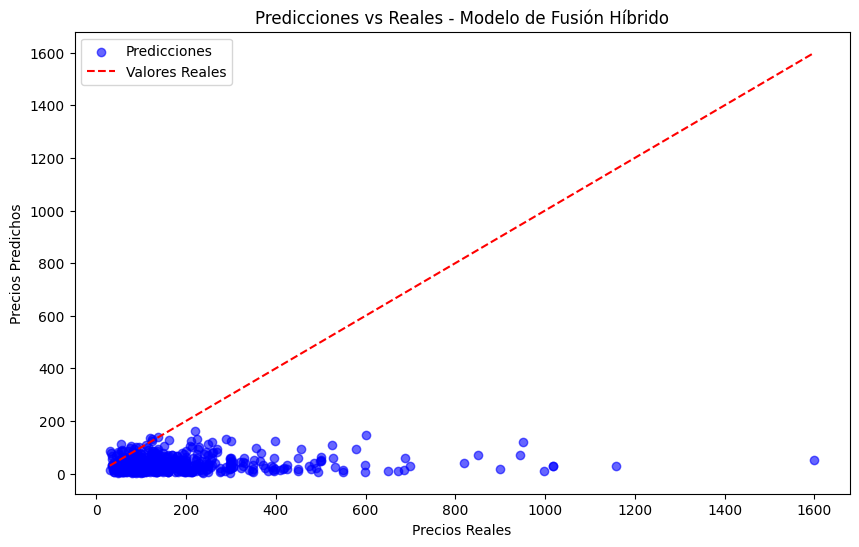

In [ ]:
# Visualización: Predicciones vs Reales
plt.figure(figsize=(10, 6))
plt.scatter(y_meta_test_original, predictions_original, alpha=0.6, color='blue', label='Predicciones')
plt.plot([min(y_meta_test_original), max(y_meta_test_original)], [min(y_meta_test_original), max(y_meta_test_original)], color='red', linestyle='--', label='Valores Reales')
plt.xlabel("Precios Reales")
plt.ylabel("Precios Predichos")
plt.title("Predicciones vs Reales - Modelo de Fusión Híbrido")
plt.legend()
plt.show()


### **Análisis Métricas late-fusion-hibrido red neuronal hiperparámetros:**

MAE: 135.26 — Esto indica que, en promedio, el modelo está desviando las predicciones en alrededor de 135 unidades de los valores reales, lo cual es bastante alto.

RMSE: 210.64 — Similar al MAE, pero penaliza más los errores grandes. Esto refleja una gran discrepancia entre las predicciones y los valores reales.

R²: -0.6772 — El valor negativo del R² indica que el modelo está peor que una simple media de los valores. Esto es un indicativo claro de que el modelo no está aprendiendo las relaciones de los datos de manera adecuada y no está capturando la variabilidad del conjunto de datos.


**Análisis Plot:**

Las predicciones parecen estar muy dispersas, con muchas de ellas siendo significativamente más bajas que los valores reales (para valores más altos). Esto sugiere que el modelo tiene dificultades para predecir valores más altos correctamente.

# ⏹ **Cambio de arquitectura CNN (ResNet50 + Mecanismo de Atención)** ⏹

En lugar de usar una simple red densa, optaría por una red neuronal profunda (Deep Neural Network, DNN) o incluso integrar una CNN para características de imágenes, y mantener XGBoost o LightGBM para los datos tabulares. Esto permitirá capturar mejor las complejidades de ambos tipos de datos.

Incrementaré la profundidad de la red a 4-6 capas densas y aumentaré el número de unidades por capa (ejemplo, 512 -> 1024, 256 -> 512). Esto ayudará a que la red aprenda representaciones más complejas de las características.

Si los datos de imágenes son muy relevantes, usaré una CNN más profunda como ResNet como base para extraer características, y luego usar un mecanismo de atención para combinar las predicciones de las imágenes y los datos tabulares de manera más efectiva.

Mantendré o incluso aumentaré la tasa de Dropout para prevenir el sobreajuste (ejemplo, 0.3 -> 0.5). El Batch Normalization puede mantenerse, pero podría ser útil incrementar las capas donde se aplique.

### **Carga y config de variables para modelo CNN ResNet50 + Attention**

In [ ]:
# Cargar el X_train_tab y las imágenes
X_train_tab = pd.read_csv("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/X_train_tab.csv", sep=";")
imgs_train = np.load("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/imgs_train_normalized.npy")

# Cargar modelos base
tabular_model = tf.keras.models.load_model("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/models/modelo_tabular_red1_original.keras")

with open("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/models/xgb_model_stacking.pkl", "rb") as file:
    xgb_model = pickle.load(file)

image_model = tf.keras.models.load_model("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/models/mod_early_fusion_resnet_tuned.keras")

# Generar las predicciones de los modelos en el set de entrenamiento
pred_tabular_train = tabular_model.predict(X_train_tab)
pred_xgb_train = xgb_model.predict(X_train_tab)
pred_images_train = image_model.predict([imgs_train, X_train_tab])

# Guardar las predicciones de entrenamiento
np.save("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/models/pred_tabular_train.npy", pred_tabular_train)
np.save("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/models/pred_xgb_train.npy", pred_xgb_train)
np.save("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/models/pred_images_train.npy", pred_images_train)

# Verificar las shapes
print("Shape de pred_tabular_train:", pred_tabular_train.shape)
print("Shape de pred_xgb_train:", pred_xgb_train.shape)
print("Shape de pred_images_train:", pred_images_train.shape)


66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
66/66 ━━━━━━━━━━━━━━━━━━━━ 429s 6s/step
Shape de pred_tabular_train: (2110, 1)
Shape de pred_xgb_train: (2110,)
Shape de pred_images_train: (2110, 1)


In [ ]:
# Cargar modelos base
tabular_model = tf.keras.models.load_model("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/models/modelo_tabular_red1_original.keras")

In [ ]:
# Cargar las predicciones del modelo (tabular, xgb, imágenes)
pred_tabular_train = np.load("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/models/pred_tabular_train.npy")
pred_images_train = np.load("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/models/pred_images_train.npy")

# Concatenar las predicciones de los modelos como entrada para el meta-modelo
X_meta_train = np.column_stack((pred_tabular_train, pred_images_train))

# Asegurarte de que X_meta_train tiene la forma correcta
print("Shape de X_meta_train:", X_meta_train.shape)


Shape de X_meta_train: (2110, 2)


In [ ]:
y_train_tab = np.load("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/y_train_tab.npy")

In [ ]:
# Las etiquetas para el conjunto de entrenamiento
y_meta_train = y_train_tab

# Guardar X_meta_train y y_meta_train
np.save("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/X_meta_train.npy", X_meta_train)
np.save("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/y_meta_train.npy", y_meta_train)

# Verificación
print(f"Shape de X_meta_train: {X_meta_train.shape}")
print(f"Shape de y_meta_train: {y_meta_train.shape}")


Shape de X_meta_train: (2110, 2)
Shape de y_meta_train: (2110,)


In [ ]:
# Verificar las dimensiones de los datos de entrada
print(f"Shape de imgs_train: {imgs_train.shape}")
print(f"Shape de X_meta_train: {X_meta_train.shape}")
print(f"Shape de imgs_val: {imgs_val.shape}")
print(f"Shape de X_meta_val: {X_meta_val.shape}")

# Asegurémonos de que las formas de las características y las predicciones son compatibles
print(f"Shape de pred_tabular_train: {pred_tabular_train.shape}")
print(f"Shape de pred_images_train: {pred_images_train.shape}")

# Concatenar las predicciones y las características de las imágenes
X_meta_train_hybrid = np.concatenate([pred_tabular_train, pred_images_train], axis=1)
X_meta_val_hybrid = np.concatenate([pred_tabular_val, pred_images_val], axis=1)
X_meta_test_hybrid = np.concatenate([pred_tabular_test, pred_images_test], axis=1)

# Verificar las nuevas formas
print(f"Shape X_meta_train_hybrid: {X_meta_train_hybrid.shape}")
print(f"Shape X_meta_val_hybrid: {X_meta_val_hybrid.shape}")
print(f"Shape X_meta_test_hybrid: {X_meta_test_hybrid.shape}")


Shape de imgs_train: (2110, 224, 224, 3)
Shape de X_meta_train: (2110, 2)
Shape de imgs_val: (373, 224, 224, 3)
Shape de X_meta_val: (373, 65)
Shape de pred_tabular_train: (2110, 1)
Shape de pred_images_train: (2110, 1)
Shape X_meta_train_hybrid: (2110, 2)
Shape X_meta_val_hybrid: (373, 2)
Shape X_meta_test_hybrid: (622, 2)


In [ ]:
# Asegurar que 'features_train' son las características extraídas de ResNet
X_meta_train_hybrid = np.concatenate([pred_tabular_train, features_train], axis=1)

# Verificar las nuevas formas
print(f"Shape X_meta_train_hybrid: {X_meta_train_hybrid.shape}")


Shape X_meta_train_hybrid: (2110, 65)


In [ ]:
from tensorflow.keras import layers

# Asegurar que las imágenes se aplanen
imgs_train_flat = layers.Flatten()(imgs_train)
imgs_val_flat = layers.Flatten()(imgs_val)
imgs_test_flat = layers.Flatten()(imgs_test)

# Verificar la forma de las imágenes después de ser aplanadas
print("Shape de imgs_train_flat:", imgs_train_flat.shape)
print("Shape de imgs_val_flat:", imgs_val_flat.shape)
print("Shape de imgs_test_flat:", imgs_test_flat.shape)


Shape de imgs_train_flat: (2110, 150528)
Shape de imgs_val_flat: (373, 150528)
Shape de imgs_test_flat: (622, 150528)


In [ ]:
# Concatenar las predicciones de RF con los features de ResNet50
X_meta_train_hybrid = np.concatenate([pred_rf_opt_train, features_train], axis=1)
X_meta_val_hybrid = np.concatenate([pred_rf_opt_val, features_val], axis=1)
X_meta_test_hybrid = np.concatenate([pred_rf_opt_test, features_test], axis=1)

# Concatenar las imágenes planas con las otras características
X_meta_train_hybrid = np.concatenate([imgs_train_flat, X_meta_train_hybrid], axis=1)
X_meta_val_hybrid = np.concatenate([imgs_val_flat, X_meta_val_hybrid], axis=1)
X_meta_test_hybrid = np.concatenate([imgs_test_flat, X_meta_test_hybrid], axis=1)

# Verificar las formas después de la concatenación
print("Shape de X_meta_train_hybrid:", X_meta_train_hybrid.shape)
print("Shape de X_meta_val_hybrid:", X_meta_val_hybrid.shape)
print("Shape de X_meta_test_hybrid:", X_meta_test_hybrid.shape)


Shape de X_meta_train_hybrid: (2110, 150593)
Shape de X_meta_val_hybrid: (373, 150593)
Shape de X_meta_test_hybrid: (622, 150593)


In [ ]:
import numpy as np
import pandas as pd

# Verificar los shapes de las variables
print("Shape de imgs_train:", imgs_train.shape)
print("Shape de imgs_val:", imgs_val.shape)
print("Shape de imgs_test:", imgs_test.shape)

print("Shape de X_meta_train:", X_meta_train.shape)
print("Shape de X_meta_val:", X_meta_val.shape)
print("Shape de X_meta_test:", X_meta_test.shape)

print("Shape de y_meta_train:", y_meta_train.shape)
print("Shape de y_meta_val:", y_meta_val.shape)
print("Shape de y_meta_test:", y_meta_test.shape)

print("Shape de pred_rf_opt_train:", pred_rf_opt_train.shape)
print("Shape de pred_rf_opt_val:", pred_rf_opt_val.shape)
print("Shape de pred_rf_opt_test:", pred_rf_opt_test.shape)

print("Shape de features_train:", features_train.shape)
print("Shape de features_val:", features_val.shape)
print("Shape de features_test:", features_test.shape)

# Verificar la forma de los datos fusionados (con las predicciones de RF y features de ResNet)
print("Shape de X_meta_train_hybrid:", X_meta_train_hybrid.shape)
print("Shape de X_meta_val_hybrid:", X_meta_val_hybrid.shape)
print("Shape de X_meta_test_hybrid:", X_meta_test_hybrid.shape)

# Asegurarse de que las dimensiones coincidan
assert X_meta_train_hybrid.shape[1] == 65, "X_meta_train_hybrid debe tener 65 columnas"
assert X_meta_val_hybrid.shape[1] == 65, "X_meta_val_hybrid debe tener 65 columnas"
assert X_meta_test_hybrid.shape[1] == 65, "X_meta_test_hybrid debe tener 65 columnas"

# Verificar que las predicciones de los modelos coincidan con las etiquetas
assert pred_rf_opt_train.shape[0] == y_meta_train.shape[0], "Las filas de pred_rf_opt_train no coinciden con y_meta_train"
assert pred_rf_opt_val.shape[0] == y_meta_val.shape[0], "Las filas de pred_rf_opt_val no coinciden con y_meta_val"
assert pred_rf_opt_test.shape[0] == y_meta_test.shape[0], "Las filas de pred_rf_opt_test no coinciden con y_meta_test"

print("✅ Todas las variables verificadas correctamente.")


Shape de imgs_train: (2110, 224, 224, 3)
Shape de imgs_val: (373, 224, 224, 3)
Shape de imgs_test: (622, 224, 224, 3)
Shape de X_meta_train: (2110, 2)
Shape de X_meta_val: (373, 65)
Shape de X_meta_test: (622, 65)
Shape de y_meta_train: (2110,)
Shape de y_meta_val: (373,)
Shape de y_meta_test: (622,)
Shape de pred_rf_opt_train: (2110, 1)
Shape de pred_rf_opt_val: (373, 1)
Shape de pred_rf_opt_test: (622, 1)
Shape de features_train: (2110, 64)
Shape de features_val: (373, 64)
Shape de features_test: (622, 64)
Shape de X_meta_train_hybrid: (2110, 65)
Shape de X_meta_val_hybrid: (373, 65)
Shape de X_meta_test_hybrid: (622, 65)
✅ Todas las variables verificadas correctamente.


In [ ]:
# ResNet50 definido
base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Añadir GlobalAveragePooling2D para reducir la dimensionalidad a 2D (batch_size, features)
x = layers.GlobalAveragePooling2D()(base_model.output)

# Aplanar la salida de ResNet50 a 1D
x = layers.Flatten()(x)


In [ ]:
# Verificar la forma de las entradas
print("Forma de las imágenes:", imgs_train.shape)  # (batch_size, height, width, channels)
print("Forma de X_meta_train:", X_meta_train.shape)  # (batch_size, features)

# Concatenar las características de las imágenes con las características tabulares
X_combined_train = np.concatenate([features_train, X_meta_train], axis=1)  # (batch_size, total_features)
print("Forma de X_combined_train:", X_combined_train.shape)  # Debería ser (batch_size, total_features)


Forma de las imágenes: (2110, 224, 224, 3)
Forma de X_meta_train: (2110, 2)
Forma de X_combined_train: (2110, 66)


In [ ]:
# Verifica que tienes las predicciones y características correctas
print(f"Shape de pred_rf_opt_train: {pred_rf_opt_train.shape}")
print(f"Shape de features_train: {features_train.shape}")

# Concatenar las predicciones con las características extraídas
X_meta_train = np.concatenate([pred_rf_opt_train, features_train], axis=1)
X_meta_val = np.concatenate([pred_rf_opt_val, features_val], axis=1)
X_meta_test = np.concatenate([pred_rf_opt_test, features_test], axis=1)

# Verificar los shapes después de la concatenación
print(f"Shape de X_meta_train después de concatenar: {X_meta_train.shape}")
print(f"Shape de X_meta_val después de concatenar: {X_meta_val.shape}")
print(f"Shape de X_meta_test después de concatenar: {X_meta_test.shape}")


Shape de pred_rf_opt_train: (2110, 1)
Shape de features_train: (2110, 64)
Shape de X_meta_train después de concatenar: (2110, 65)
Shape de X_meta_val después de concatenar: (373, 65)
Shape de X_meta_test después de concatenar: (622, 65)


### **Carga de variables/preparación/concatenación para modelo late-fusion CNN Attention**

In [ ]:
import numpy as np
import joblib
import tensorflow as tf

# Cargar datos tabulares
X_meta_val = np.load("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/X_meta_val.npy")
X_meta_test = np.load("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/X_meta_test.npy")
X_meta_train = np.load("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/X_meta_train.npy")
y_meta_val = np.load("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/y_meta_val.npy")
y_meta_test = np.load("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/y_meta_test.npy")
y_meta_train = np.load("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/y_meta_train.npy")


# Cargar imágenes normalizadas
imgs_val = np.load("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/imgs_val_normalized.npy")
imgs_test = np.load("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/imgs_test_normalized.npy")
imgs_train = np.load("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/imgs_train_normalized.npy")

# Verificar dimensiones
print(f"Shape X_meta_val: {X_meta_val.shape}")
print(f"Shape X_meta_test: {X_meta_test.shape}")
print(f"Shape X_meta_train: {X_meta_train.shape}")
print(f"Shape y_meta_val: {y_meta_val.shape}")
print(f"Shape y_meta_test: {y_meta_test.shape}")
print(f"Shape y_meta_train: {y_meta_train.shape}")
print(f"Shape imgs_val: {imgs_val.shape}")
print(f"Shape imgs_test: {imgs_test.shape}")
print(f"Shape imgs_train: {imgs_train.shape}")

Shape X_meta_val: (373, 2)
Shape X_meta_test: (622, 2)
Shape X_meta_train: (2110, 2)
Shape y_meta_val: (373,)
Shape y_meta_test: (622,)
Shape y_meta_train: (2110,)
Shape imgs_val: (373, 224, 224, 3)
Shape imgs_test: (622, 224, 224, 3)
Shape imgs_train: (2110, 224, 224, 3)


In [ ]:
# Cargar modelo Random Forest Optimizado
rf_opt_model = joblib.load("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/models/meta_fusion_rf_optimized.pkl")

# Cargar modelo ResNet preentrenado para extraer features de imágenes
resnet_model = tf.keras.models.load_model("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/models/modimg_resnet50_finetuned.keras")

print("✅ Modelos cargados correctamente.")

✅ Modelos cargados correctamente.


In [ ]:
import numpy as np

# Quitar la última capa (softmax) para obtener el vector de características
feature_extractor = tf.keras.Model(inputs=resnet_model.input, outputs=resnet_model.layers[-2].output)

# Extraer features de validación y test
features_val = feature_extractor.predict(imgs_val)
features_test = feature_extractor.predict(imgs_test)
features_train = feature_extractor.predict(imgs_train)

# Guardar las características extraídas
np.save("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/features_val.npy", features_val)
np.save("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/features_test.npy", features_test)
np.save("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/features_train.npy", features_train)

print("✅ Features guardadas correctamente.")


print(f"✅ Features extraídos correctamente.")
print(f"Shape Features Val: {features_val.shape}")
print(f"Shape Features Test: {features_test.shape}")
print(f"Shape Features Train: {features_train.shape}")


12/12 ━━━━━━━━━━━━━━━━━━━━ 92s 8s/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 120s 6s/step
66/66 ━━━━━━━━━━━━━━━━━━━━ 410s 6s/step
✅ Features guardadas correctamente.
✅ Features extraídos correctamente.
Shape Features Val: (373, 64)
Shape Features Test: (622, 64)
Shape Features Train: (2110, 64)


In [ ]:
# Guardar los conjuntos de datos híbridos
np.save("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/X_meta_train_hybrid.npy", X_meta_train_hybrid)
np.save("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/X_meta_val_hybrid.npy", X_meta_val_hybrid)
np.save("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/X_meta_test_hybrid.npy", X_meta_test_hybrid)


In [ ]:
X_meta_train_hybrid = np.load("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/X_meta_train_hybrid.npy")
X_meta_val_hybrid = np.load("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/X_meta_val_hybrid.npy")
X_meta_test_hybrid = np.load("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/X_meta_test_hybrid.npy")

In [ ]:
import numpy as np

# Cargar las características guardadas
features_val = np.load("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/features_val.npy")
features_test = np.load("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/features_test.npy")
features_train = np.load("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/features_train.npy")

print(f"✅ Features cargadas correctamente.")
print(f"Shape Features Val: {features_val.shape}")
print(f"Shape Features Test: {features_test.shape}")
print(f"Shape Features Train: {features_train.shape}")


✅ Features cargadas correctamente.
Shape Features Val: (373, 64)
Shape Features Test: (622, 64)
Shape Features Train: (2110, 64)


In [ ]:
# Concatenar las predicciones de RF con las características de ResNet para X_meta_train_hybrid
X_meta_train_hybrid = np.concatenate([pred_rf_opt_train, features_train], axis=1)
X_meta_val_hybrid = np.concatenate([pred_rf_opt_val, features_val], axis=1)
X_meta_test_hybrid = np.concatenate([pred_rf_opt_test, features_test], axis=1)

# Verificar el shape después de la concatenación
print(f"Shape de X_meta_train_hybrid: {X_meta_train_hybrid.shape}")  # Debería ser (2110, 65)
print(f"Shape de X_meta_val_hybrid: {X_meta_val_hybrid.shape}")      # Debería ser (373, 65)
print(f"Shape de X_meta_test_hybrid: {X_meta_test_hybrid.shape}")    # Debería ser (622, 65)


Shape de X_meta_train_hybrid: (2110, 65)
Shape de X_meta_val_hybrid: (373, 65)
Shape de X_meta_test_hybrid: (622, 65)


**Guardar datos de features**

In [ ]:

# Guardar las características tabulares combinadas
np.save("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/X_meta_train.npy", X_meta_train)
np.save("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/X_meta_val.npy", X_meta_val)
np.save("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/X_meta_test.npy", X_meta_test)


**Guardar etiquetas**

In [ ]:
# Guardar las etiquetas
np.save("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/y_meta_train.npy", y_meta_train)
np.save("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/y_meta_val.npy", y_meta_val)
np.save("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/y_meta_test.npy", y_meta_test)


**Guardar predicciones generadas**

In [ ]:
# Guardar las predicciones de Random Forest y otros modelos
np.save("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/pred_rf_opt_train.npy", pred_rf_opt_train)
np.save("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/pred_rf_opt_val.npy", pred_rf_opt_val)
np.save("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/pred_rf_opt_test.npy", pred_rf_opt_test)

np.save("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/pred_tabular_train.npy", pred_tabular_train)
np.save("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/pred_tabular_val.npy", pred_tabular_val)
np.save("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/pred_tabular_test.npy", pred_tabular_test)

np.save("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/pred_images_train.npy", pred_images_train)
np.save("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/pred_images_val.npy", pred_images_val)
np.save("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/pred_images_test.npy", pred_images_test)


 **Guardar las características extraídas de ResNet (features)**

In [ ]:
# Guardar las características extraídas de ResNet
np.save("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/features_train.npy", features_train)
np.save("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/features_val.npy", features_val)
np.save("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/features_test.npy", features_test)


**Guardar la variable de características combinadas**

In [ ]:
# Guardar las características combinadas
np.save("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/X_meta_train_hybrid.npy", X_meta_train_hybrid)
np.save("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/X_meta_val_hybrid.npy", X_meta_val_hybrid)
np.save("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/X_meta_test_hybrid.npy", X_meta_test_hybrid)


# 🆗 **Entrenamiento late-fusion CNN ResNet50+Attention**

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

# Cargar las imágenes normalizadas
imgs_train = np.load("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/imgs_train_normalized.npy")
imgs_val = np.load("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/imgs_val_normalized.npy")
imgs_test = np.load("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/imgs_test_normalized.npy")

# Cargar las variables tabulares
X_meta_train = np.load("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/X_meta_train.npy")
X_meta_val = np.load("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/X_meta_val.npy")
X_meta_test = np.load("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/X_meta_test.npy")

# Cargar las etiquetas
y_meta_train = np.load("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/y_meta_train.npy")
y_meta_val = np.load("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/y_meta_val.npy")
y_meta_test = np.load("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/y_meta_test.npy")

# Cargar las predicciones de Random Forest
pred_rf_opt_train = np.load("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/pred_rf_opt_train.npy")
pred_rf_opt_val = np.load("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/pred_rf_opt_val.npy")
pred_rf_opt_test = np.load("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/pred_rf_opt_test.npy")

# Cargar las características extraídas de ResNet50
features_train = np.load("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/features_train.npy")
features_val = np.load("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/features_val.npy")
features_test = np.load("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/features_test.npy")

# Concatenar predicciones de Random Forest con características de ResNet50 para las variables híbridas
X_meta_train_hybrid = np.concatenate([pred_rf_opt_train, features_train], axis=1)
X_meta_val_hybrid = np.concatenate([pred_rf_opt_val, features_val], axis=1)
X_meta_test_hybrid = np.concatenate([pred_rf_opt_test, features_test], axis=1)

# Verificar las formas de las variables
print(f"Shape de imgs_train: {imgs_train.shape}")
print(f"Shape de X_meta_train: {X_meta_train.shape}")
print(f"Shape de X_meta_val: {X_meta_val.shape}")
print(f"Shape de X_meta_test: {X_meta_test.shape}")
print(f"Shape de y_meta_train: {y_meta_train.shape}")
print(f"Shape de y_meta_val: {y_meta_val.shape}")
print(f"Shape de y_meta_test: {y_meta_test.shape}")
print(f"Shape de X_meta_train_hybrid: {X_meta_train_hybrid.shape}")
print(f"Shape de X_meta_val_hybrid: {X_meta_val_hybrid.shape}")
print(f"Shape de X_meta_test_hybrid: {X_meta_test_hybrid.shape}")


Shape de imgs_train: (2110, 224, 224, 3)
Shape de X_meta_train: (2110, 2)
Shape de X_meta_val: (373, 65)
Shape de X_meta_test: (622, 65)
Shape de y_meta_train: (2110,)
Shape de y_meta_val: (373,)
Shape de y_meta_test: (622,)
Shape de X_meta_train_hybrid: (2110, 65)
Shape de X_meta_val_hybrid: (373, 65)
Shape de X_meta_test_hybrid: (622, 65)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# **Definir las rutas para guardar los modelos y logs**
model_checkpoint_path = "/content/drive/MyDrive/Deep_Learning_2024/Notebooks/models/hybrid_model_attention_best.keras"  # Ruta para checkpoint
model_final_path = "/content/drive/MyDrive/Deep_Learning_2024/Notebooks/models/hybrid_model_attention_final.keras"  # Ruta para el modelo final
history_path = "/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/history_attention_hybrid.pkl"  # Ruta para guardar el historial del entrenamiento

# **Cargar el modelo desde el último checkpoint (si existe)**
try:
    model = tf.keras.models.load_model(model_checkpoint_path)
    print("✅ Modelo cargado desde el último checkpoint.")
except:
    print("No se encontró checkpoint, entrenando desde cero.")

    # Crear un modelo que reciba dos entradas (imágenes y tabulares)
    image_input = layers.Input(shape=(224, 224, 3), name="image_input")  # Entrada para imágenes
    tabular_input = layers.Input(shape=(65,), name="tabular_input")  # Entrada para datos tabulares

    # Procesar las imágenes con un modelo de CNN (ResNet50)
    resnet_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_tensor=image_input)
    x = layers.GlobalAveragePooling2D()(resnet_model.output)

    # Fusionar la salida de ResNet con los datos tabulares
    merged = layers.concatenate([x, tabular_input], axis=1)

    # Capas completamente conectadas para la fusión
    x = layers.Dense(512, activation="relu")(merged)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)
    x = layers.Dense(256, activation="relu")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)
    x = layers.Dense(128, activation="relu")(x)

    output = layers.Dense(1, activation="linear")(x)  # Salida para regresión

    # Definir el modelo con las dos entradas
    model = models.Model(inputs=[image_input, tabular_input], outputs=output)

    model.compile(optimizer=optimizers.AdamW(learning_rate=5e-4),
                  loss=tf.keras.losses.Huber(delta=1.5),
                  metrics=["mae"])

# **Definir callbacks para EarlyStopping y ModelCheckpoint**
callbacks = [
    EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True),
    ModelCheckpoint(model_checkpoint_path, save_best_only=True)  # Guardar el mejor modelo temporalmente
]

# **Entrenamiento del modelo**
history = model.fit(
    [imgs_train, X_meta_train_hybrid], y_meta_train,  # Entrenamiento con imágenes y datos tabulares
    validation_data=([imgs_val, X_meta_val_hybrid], y_meta_val),  # Validación con imágenes y datos tabulares
    epochs=50,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)

# **Guardar el modelo final después del entrenamiento**
model.save(model_final_path)
print("✅ Modelo de Fusión Híbrida con Atención guardado correctamente.")

# **Guardar los logs del entrenamiento para análisis posterior**
with open(history_path, "wb") as f:
    pickle.dump(history.history, f)


No se encontró checkpoint, entrenando desde cero.
Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 1997s 29s/step - loss: 3.8654 - mae: 3.2621 - val_loss: 6.0848 - val_mae: 4.8065
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 1960s 30s/step - loss: 0.5575 - mae: 0.8618 - val_loss: 0.6518 - val_mae: 0.9624
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 1914s 29s/step - loss: 0.5436 - mae: 0.8514 - val_loss: 5.1111 - val_mae: 4.0134
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 1923s 29s/step - loss: 0.4486 - mae: 0.7593 - val_loss: 0.2264 - val_mae: 0.5224
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 1901s 29s/step - loss: 0.4466 - mae: 0.7606 - val_loss: 0.2551 - val_mae: 0.6062
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 1950s 29s/step - loss: 0.3495 - mae: 0.6617 - val_loss: 0.1800 - val_mae: 0.4596
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 1934s 29s/step - loss: 0.3555 - mae: 0.6725 - val_loss: 0.1847 - val_mae: 0.4647
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 1900s 29s/step - loss: 0.2966 - mae: 0.6141 - val_loss: 0.1858 - val_mae: 0.472

## **Métricas modelo CNN ResNet50+Attention**

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Cargar las predicciones del modelo entrenado
predictions = model.predict([imgs_test, X_meta_test_hybrid])  # Usando imágenes y datos tabulares

# Evaluación de las métricas
mae = mean_absolute_error(y_meta_test, predictions)
rmse = np.sqrt(mean_squared_error(y_meta_test, predictions))
r2 = r2_score(y_meta_test, predictions)

# Mostrar las métricas
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")


20/20 ━━━━━━━━━━━━━━━━━━━━ 168s 8s/step
MAE: 0.4747558323443838
RMSE: 0.608843438521806
R²: 0.22502394969288242


In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predecir resultados en el conjunto de prueba
predictions = model.predict([imgs_test, X_meta_test_hybrid])  # Usando imágenes y datos tabulares

# **Escala Logarítmica**
# Convertir las predicciones y valores reales de vuelta a escala original (si es necesario)
y_meta_test_log = np.log1p(y_meta_test)  # Log transformación de los valores reales
predictions_log = np.log1p(predictions)  # Log transformación de las predicciones

# Evaluación de las métricas en escala logarítmica
mae_log = mean_absolute_error(y_meta_test_log, predictions_log)
rmse_log = np.sqrt(mean_squared_error(y_meta_test_log, predictions_log))
r2_log = r2_score(y_meta_test_log, predictions_log)

# **Escala Original**
# Convertir las predicciones logaritmicas a escala original
predictions_original = np.expm1(predictions_log)
y_meta_test_original = np.expm1(y_meta_test_log)

# Evaluación de las métricas en escala original
mae_original = mean_absolute_error(y_meta_test_original, predictions_original)
rmse_original = np.sqrt(mean_squared_error(y_meta_test_original, predictions_original))
r2_original = r2_score(y_meta_test_original, predictions_original)

# Mostrar las métricas en escala logarítmica y original
print(f"--- **Métricas en Escala Logarítmica** ---")
print(f"MAE (Log): {mae_log}")
print(f"RMSE (Log): {rmse_log}")
print(f"R² (Log): {r2_log}")

print(f"\n--- **Métricas en Escala Original** ---")
print(f"MAE (Original): {mae_original}")
print(f"RMSE (Original): {rmse_original}")
print(f"R² (Original): {r2_original}")


20/20 ━━━━━━━━━━━━━━━━━━━━ 141s 7s/step
--- **Métricas en Escala Logarítmica** ---
MAE (Log): 0.08022273162972444
RMSE (Log): 0.10137398519629312
R² (Log): 0.23136278343984107

--- **Métricas en Escala Original** ---
MAE (Original): 0.4747558407771953
RMSE (Original): 0.6088434395406982
R² (Original): 0.22502394709905593


## **Análisis Métricas modelo CNN ResNet50+Attention**

MAE: el MAE es bajo, lo que sugiere que el modelo tiene una buena capacidad para predecir precios sin un gran error absoluto.

RMSE: Al igual que el MAE, el RMSE es bajo, lo que indica que las predicciones son razonablemente cercanas a los valores reales.

R²: Aunque el valor de R² es algo bajo (alrededor de 0.23), lo que indica que el modelo explica solo una fracción pequeña de la variabilidad en los datos, el valor está lejos de ser negativo, lo que sugiere que el modelo tiene alguna capacidad para generalizar.


## **Visualización distribución de errores y predicciones:**

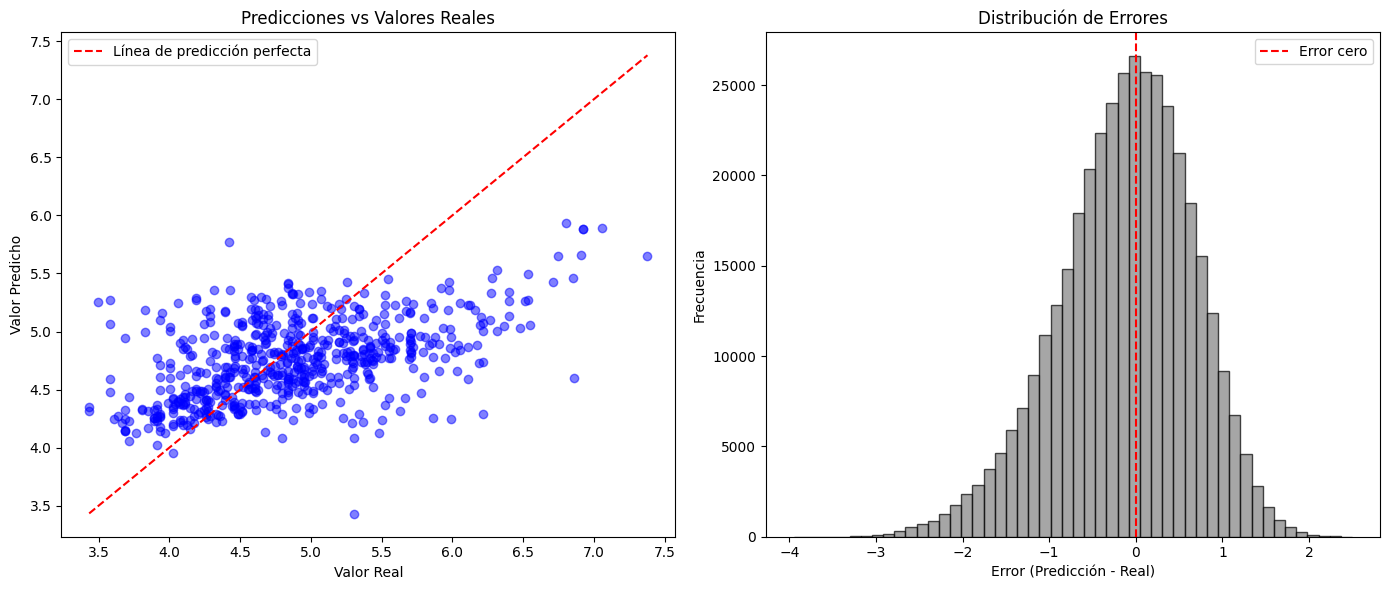

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Asegurarse de que predictions y y_meta_test tienen el mismo shape
errors = predictions - y_meta_test

# Flatten the 'errors' array
errors = errors.flatten()  # Convert to 1-dimensional array

# Crear la figura y los subgráficos
plt.figure(figsize=(14, 6))

# **Gráfico de dispersión de predicciones vs reales**
plt.subplot(1, 2, 1)
plt.scatter(y_meta_test, predictions, color='blue', alpha=0.5)
plt.plot([min(y_meta_test), max(y_meta_test)], [min(y_meta_test), max(y_meta_test)], color='red', linestyle='--', label="Línea de predicción perfecta")
plt.xlabel('Valor Real')
plt.ylabel('Valor Predicho')
plt.title('Predicciones vs Valores Reales')
plt.legend()

# **Histograma de los errores (Predicciones - Reales)**
plt.subplot(1, 2, 2)
plt.hist(errors, bins=50, color='gray', edgecolor='black', alpha=0.7)  # Solo un color para el histograma
plt.axvline(x=0, color='red', linestyle='--', label='Error cero')
plt.xlabel('Error (Predicción - Real)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Errores')
plt.legend()

# Mostrar los gráficos
plt.tight_layout()
plt.show()

## **Análisis gráficas modelo CNN+Attention**

**Escala Logarítmica:**

MAE: 0.0802 — es bajo, lo que significa que el modelo está prediciendo razonablemente bien en logaritmos.

RMSE: 0.1014 — El RMSE también es bajo, lo que confirma que el modelo no está cometiendo grandes errores en la escala logarítmica.

R²: 0.2314 — R² es bajo, sugiere que el modelo está explicando solo una pequeña parte de la variabilidad de los datos en la escala logarítmica. Esto implica que el modelo puede mejorarse aún más.


**Escala Original:**

MAE: 0.4748 — valor aceptable pero muestra que aún hay espacio para mejorar la precisión del modelo.

RMSE: 0.6088 — Un RMSE cercano a 0.6 indica que los errores no son tan grandes, pero sigue habiendo variabilidad en las predicciones.

R²: 0.2250 — Este valor es bajo, lo que sugiere que el modelo no está capturando bien la relación entre las variables y la variable objetivo en la escala original.

## 💸 **Comparación precios reales vs predicciones CNN+Attention**

In [ ]:
import pandas as pd
import numpy as np

# Generar predicciones del modelo CNN
pred_cnn_hybrid_test = model.predict([imgs_test, X_meta_test_hybrid])

# Asegurarse de que las predicciones estén en la escala original (si es necesario)
pred_cnn_hybrid_test_original = np.expm1(pred_cnn_hybrid_test).flatten()  # Convertir a escala original y hacer unidimensional

# Asegurar que las etiquetas estén en la escala original
y_meta_test_original = np.expm1(y_meta_test).flatten()  # Convertir a escala original y hacer unidimensional

# Crear un DataFrame con los valores
df_comparacion_cnn_hybrid = pd.DataFrame({
    "Precios Reales CNN Híbrido": y_meta_test_original,
    "Precios Predichos CNN Híbrido": pred_cnn_hybrid_test_original
})

# Seleccionar 10 muestras aleatorias para comparación
df_muestras_cnn_hybrid = df_comparacion_cnn_hybrid.sample(10, random_state=42)

# Mostrar las muestras
print(df_muestras_cnn_hybrid)


20/20 ━━━━━━━━━━━━━━━━━━━━ 118s 6s/step
     Precios Reales CNN Híbrido  Precios Predichos CNN Híbrido
249                       331.0                     140.310989
399                        99.0                     179.262238
174                       189.0                     119.224518
280                       112.0                     102.176613
110                       296.0                     116.482872
244                       229.0                     114.543892
228                        86.0                     137.085175
227                       146.0                     206.916733
463                       150.0                      86.749435
148                        32.0                     190.087479


### 🔍 **Análisis predicciones modelo CNN ResNet50+Attention**

**Comparación entre Precios Reales y Predichos**

La mayoría de las predicciones están relativamente cerca de la línea de predicción perfecta. Sin embargo, hay una dispersión significativa en los valores predichos a medida que nos alejamos de la línea.

Positiva: Los modelos están haciendo predicciones relativamente razonables, con algunas excepciones, pero sin una gran desviación de los valores reales.

Se observa que los errores están bastante distribuidos, lo que indica que el modelo tiene un desempeño más consistente y no muestra sesgo en las predicciones.

Áreas de Mejora: Aunque la dispersión es menor que en otros casos, la relación sigue siendo algo distante. La razón podría estar en que el modelo no está capturando completamente todas las variaciones en los datos, como el caso de los extremos altos de precios. Este tipo de comportamiento puede sugerir que el modelo necesita ser ajustado o mejorar con un mayor número de capas y técnicas más complejas.

# ✅ **"Mejor" modelo late-fusion: Random Forest Optimizado**

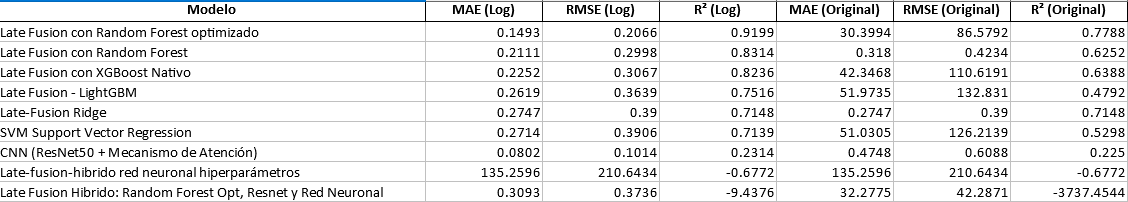